In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime, timedelta
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


Train = pd.read_csv('train_values.csv', encoding = 'latin-1')
Test = pd.read_csv('test_values.csv', encoding = 'latin-1')
Labels = pd.read_csv('train_labels.csv', encoding = 'latin-1')
Train2 = pd.merge(Train, Labels, on='process_id')
Test2 = Test #pd.merge(Test, Labels, on='process_id')
Train2['pipeline'] = Train2['pipeline'].str[1:].astype(int)
Test2['pipeline'] = Test2['pipeline'].str[1:].astype(int)
Train2.columns.values

array(['row_id', 'process_id', 'object_id', 'phase', 'timestamp',
       'pipeline', 'supply_flow', 'supply_pressure', 'return_temperature',
       'return_conductivity', 'return_turbidity', 'return_flow',
       'supply_pump', 'supply_pre_rinse', 'supply_caustic',
       'return_caustic', 'supply_acid', 'return_acid',
       'supply_clean_water', 'return_recovery_water', 'return_drain',
       'object_low_level', 'tank_level_pre_rinse', 'tank_level_caustic',
       'tank_level_acid', 'tank_level_clean_water',
       'tank_temperature_pre_rinse', 'tank_temperature_caustic',
       'tank_temperature_acid', 'tank_concentration_caustic',
       'tank_concentration_acid', 'tank_lsh_caustic', 'tank_lsh_acid',
       'tank_lsh_clean_water', 'tank_lsh_pre_rinse', 'target_time_period',
       'final_rinse_total_turbidity_liter'], dtype=object)

In [2]:
Train2

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,...,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,final_rinse_total_turbidity_liter
0,0,20001,405,pre_rinse,2018-04-15 04:20:47,4,8550.348000,0.615451,18.044704,4.990765,...,83.036750,73.032410,45.394646,44.340126,False,0.0,False,0.0,False,4.318275e+06
1,1,20001,405,pre_rinse,2018-04-15 04:20:49,4,11364.294000,0.654297,18.229168,3.749680,...,83.015045,73.032410,45.394447,44.339380,False,0.0,False,0.0,False,4.318275e+06
2,2,20001,405,pre_rinse,2018-04-15 04:20:51,4,12174.479000,0.699870,18.395544,2.783954,...,83.015045,73.032410,45.396280,44.336735,False,0.0,False,0.0,False,4.318275e+06
3,3,20001,405,pre_rinse,2018-04-15 04:20:53,4,13436.776000,0.761502,18.583622,1.769353,...,83.036750,73.032410,45.401875,44.333110,False,0.0,False,0.0,False,4.318275e+06
4,4,20001,405,pre_rinse,2018-04-15 04:20:55,4,13776.766000,0.837240,18.627026,0.904020,...,83.015045,73.032410,45.398197,44.334373,False,0.0,False,0.0,False,4.318275e+06
5,5,20001,405,pre_rinse,2018-04-15 04:20:57,4,18710.215000,0.944444,18.583622,0.509684,...,82.993350,73.032410,45.385914,44.336000,False,0.0,False,0.0,False,4.318275e+06
6,6,20001,405,pre_rinse,2018-04-15 04:20:59,4,21216.725000,1.032118,18.460648,0.443773,...,82.993350,73.032410,45.369984,44.332523,False,0.0,False,0.0,False,4.318275e+06
7,7,20001,405,pre_rinse,2018-04-15 04:21:01,4,22403.066000,1.087891,18.420862,0.521089,...,82.953560,73.032410,45.381107,44.336490,False,0.0,False,0.0,False,4.318275e+06
8,8,20001,405,pre_rinse,2018-04-15 04:21:03,4,23278.357000,1.140842,18.420862,0.779835,...,82.953560,73.032410,45.402290,44.334263,False,0.0,False,0.0,False,4.318275e+06
9,9,20001,405,pre_rinse,2018-04-15 04:21:05,4,24178.965000,1.191623,18.377459,1.552591,...,82.953560,73.032410,45.405660,44.334488,False,0.0,False,0.0,False,4.318275e+06


In [2]:
meta = pd.read_csv('recipe_metadata.csv', encoding = 'latin-1')
meta['tot'] = meta['pre_rinse'] + meta['caustic'] + meta['intermediate_rinse'] + meta['acid'] + meta['final_rinse']
meta5 = meta[meta['tot'] == 5]
list5 = meta5.process_id
meta.tot.unique()


array([5, 3])

In [3]:
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

Test2a = Test2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period']]
Test2a['timestamp'] = Test2a['timestamp'].astype('datetime64[ns]')
Test2a['Time_diff'] = Test2a.timestamp.diff()/ timedelta (seconds=1)
Test2a.Time_diff[Test2a['Time_diff'] != 2.0] = 0
Target_time_test = Test2a[Test2a['target_time_period']]
Test2aF = Test2a#[Train2a['target_time_period'] == False]


#Test2aF = Test2aF[Test2aF['process_id'].isin(list5)]

Test2b = Test2[['process_id', 'object_id','pipeline']]

Object_id_test = Test2b.groupby(['process_id', 'object_id']).first()
pipeline_test = Test2b.groupby(['process_id', 'pipeline']).first()

first_test = Test2aF.groupby(['process_id', 'phase']).first()
last_test = Test2aF.groupby(['process_id', 'phase']).last()

first_test = first_test['return_turbidity'].unstack()
last_test = last_test['return_turbidity'].unstack()


max_test = Test2aF.groupby(['process_id', 'phase']).max()

Suppl_flow_test = max_test['supply_flow'].unstack()
ret_flow_test = max_test['return_flow'].unstack()
ret_turbid_test = max_test['return_turbidity'].unstack()


Last_first_test = pd.merge(first_test, last_test, on = 'process_id')
Time_test = Test2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess_test = pd.merge(Last_first_test, Time_test, on = 'process_id')



DatProcess_test.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 'intermediate_rinse':
                             't_intermediate_rinse', 'acid': 't_acid'},
                 inplace = True)

DatProcess_test = DatProcess_test[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'intermediate_rinse_x',
                         't_intermediate_rinse', 'intermediate_rinse_y', 'acid_x', 't_acid', 'acid_y'
                         ]]


Suppl_flow_test.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 'intermediate_rinse':
                             'max_suppl_I_R', 'acid': 'max_suppl_acid'},
                 inplace = True)


ret_flow_test.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 'intermediate_rinse':
                             'max_ret_I_R', 'acid': 'max_ret_acid'},
                 inplace = True)


ret_turbid_test.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 'intermediate_rinse':
                             'max_T_I_R', 'acid': 'max_T_acid'},
                 inplace = True)

RFSF_test = pd.merge(Suppl_flow_test, ret_flow_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSF_test, ret_turbid_test, on = 'process_id')

DatProcess_test = pd.merge(DatProcess_test, RFSFRT_test, on = 'process_id')
DatProcess_test.reset_index(inplace = True)
DatProcess_test.process_id = DatProcess_test.process_id.astype(int)





DatProcess_test = pd.merge(Object_id_test, DatProcess_test, on = 'process_id')
DatProcess_test = pd.merge(pipeline_test, DatProcess_test, on = 'process_id')
Process_id_test = DatProcess_test['process_id']

DatProcess_testall = DatProcess_test
DatProcess_testall

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

,process_id,object_id,pipeline,pre_rinse_x,t_pre_rinse,pre_rinse_y,caustic_x,t_caustic,caustic_y,intermediate_rinse_x,...,max_suppl_I_R,max_suppl_P_R,max_ret_acid,max_ret_caustic,max_ret_I_R,max_ret_P_R,max_T_acid,max_T_caustic,max_T_I_R,max_T_P_R
0,20000,427,4,0.018084,174.0,1.432292,4.481337,878.0,1.660156,NaN,...,NaN,35069.4450,NaN,38017.2150,NaN,38765.9140,NaN,13.118489,NaN,87.832756
1,20006,914,6,0.524450,114.0,0.365307,0.361690,386.0,6.676794,NaN,...,NaN,20039.4260,NaN,24743.2010,NaN,24553.3120,NaN,15.274161,NaN,2.289497
2,20007,918,6,0.936777,114.0,1.743345,1.732494,364.0,1.584201,1.613136,...,20540.363,20191.3340,NaN,24936.7050,21683.305,24600.3320,NaN,58.047600,1.707176,4.734520
3,20009,426,4,1.255064,170.0,0.390625,0.368924,770.0,2.596933,1.139323,...,103150.320,35177.9530,NaN,48169.8480,37402.344,48144.5300,NaN,17.078993,1.623987,86.783860
4,20010,924,7,0.318287,170.0,0.810185,0.774016,868.0,2.882668,3.088831,...,45882.164,50057.8670,43330.440,47697.8440,40988.500,48162.6170,64.380790,45.829716,39.565250,30.653212
5,20012,922,7,0.039786,172.0,1.772280,1.710793,546.0,46.737556,44.151478,...,34951.900,50506.3670,NaN,51575.1600,43044.703,47963.6880,NaN,49.884260,44.151478,27.987558
6,20013,116,1,0.130208,140.0,0.661892,0.607639,1682.0,1.186343,NaN,...,NaN,6064.8150,NaN,5732.0600,NaN,5839.1200,NaN,44.715710,NaN,40.165653
7,20015,940,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40816.695,NaN,NaN,NaN,0.148293,NaN,NaN,NaN
8,20020,923,7,2.159288,172.0,0.792101,0.723380,852.0,2.781395,3.240741,...,46742.984,49584.0600,NaN,47108.2900,39196.324,51578.7770,NaN,65.136720,6.517650,6.991464
9,20021,305,3,NaN,NaN,NaN,0.571470,968.0,1.200810,NaN,...,NaN,NaN,NaN,36744.0660,NaN,NaN,NaN,3.873698,NaN,NaN


In [ ]:
len(DatProcess_testall)

In [4]:
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

# 'tank_level_clean_water'

Train2a = Train2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period']]

Train2a['timestamp'] = Train2a['timestamp'].astype('datetime64[ns]')
Train2a['Time_diff'] = Train2a.timestamp.diff()/ timedelta (seconds=1)
Train2a.Time_diff[Train2a['Time_diff'] != 2.0] = 0
Target_time = Train2a[Train2a['target_time_period']]
Train2aF = Train2a#[Train2a['target_time_period'] == False]


#Train2aF = Train2aF[Train2aF['process_id'].isin(list5)]

Train2b = Train2[['process_id', 'object_id','pipeline']]



Object_id = Train2b.groupby(['process_id', 'object_id']).first()
pipeline = Train2b.groupby(['process_id', 'pipeline']).first()

first = Train2aF.groupby(['process_id', 'phase']).first()
last = Train2aF.groupby(['process_id', 'phase']).last()

first = first['return_turbidity'].unstack()
last = last['return_turbidity'].unstack()


max_ = Train2aF.groupby(['process_id', 'phase']).max()

Suppl_flow = max_['supply_flow'].unstack()
ret_flow = max_['return_flow'].unstack()
ret_turbid = max_['return_turbidity'].unstack()


Last_first = pd.merge(first, last, on = 'process_id')
Time = Train2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess = pd.merge(Last_first, Time, on = 'process_id')



DatProcess.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 'intermediate_rinse':
                             't_intermediate_rinse', 'acid': 't_acid', 'final_rinse': 't_final_rinse'},
                 inplace = True)

DatProcess = DatProcess[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'intermediate_rinse_x',
                         't_intermediate_rinse', 'intermediate_rinse_y', 'acid_x', 't_acid', 'acid_y',
                         'final_rinse_x',
                        't_final_rinse', 'final_rinse_y']]


Suppl_flow.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 'intermediate_rinse':
                             'max_suppl_I_R', 'acid': 'max_suppl_acid', 
                                      'final_rinse': 'max_suppl_final_rinse'},
                 inplace = True)


ret_flow.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 'intermediate_rinse':
                             'max_ret_I_R', 'acid': 'max_ret_acid', 
                                    'final_rinse': 'max_ret_final_rinse'},
                 inplace = True)


ret_turbid.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 'intermediate_rinse':
                             'max_T_I_R', 'acid': 'max_T_acid', 
                                    'final_rinse': 'max_T_final_rinse'},
                 inplace = True)

RFSF = pd.merge(Suppl_flow, ret_flow, on = 'process_id')
RFSFRT = pd.merge(RFSF, ret_turbid, on = 'process_id')

DatProcess = pd.merge(DatProcess, RFSFRT, on = 'process_id')
DatProcess.reset_index(inplace = True)
DatProcess.process_id = DatProcess.process_id.astype(int)



DatProcess


#'20146',
# '20341',
# '21637',
# '21833',
# '21941',
# '23756',
# '23830',
# '25376',
# '26908

#Train2a[Train2a['process_id'] == 20146].phase.unique()
#meta[meta['process_id'] == 26908]
#Train2a[Train2a['process_id'] == 26908].target_time_period
#DatProcess

DatProcess = pd.merge(Object_id, DatProcess, on = 'process_id')
DatProcess = pd.merge(pipeline, DatProcess, on = 'process_id')
Process_id = DatProcess['process_id']

le = preprocessing.LabelEncoder()

Merging = pd.concat([DatProcess, DatProcess_test], sort = False)
Merging_encoded = Merging.apply(le.fit_transform)

DatProcess_encoded = Merging_encoded[:len(DatProcess)]
DatProcess_test_encoded = Merging_encoded[len(DatProcess):]

DatProcess_encoded = DatProcess_encoded.drop(['process_id'], axis=1)
DatProcess_encoded = pd.concat([Process_id, DatProcess_encoded], axis=1)
DatProcess_encoded = pd.merge(DatProcess_encoded, Labels, on = 'process_id')

DatProcess_test_encoded = DatProcess_test_encoded.drop(['process_id'], axis=1)
DatProcess_test_encoded = pd.concat([Process_id_test, DatProcess_test_encoded], axis=1)
#DatProcess_test_encoded = pd.merge(DatProcess_test_encoded, Labels, on = 'process_id')


X3 = DatProcess_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse', 'final_rinse_total_turbidity_liter' 
                             ], 
                             axis = 1) # Trainning columns

Xtestall = DatProcess_test_encoded.drop(['process_id', 'final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse'], axis =1)

y3 = DatProcess_encoded.final_rinse_total_turbidity_liter.astype(int) #testing columns



X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

scaler = MinMaxScaler() #for scaling

X_train_Scl2 = scaler.fit_transform(X_train3) #scaling the data since we distance and the weight 
X_test_Scl2 = scaler.transform(X_test3)# can have an effect on the regression

Xtestall_scl = scaler.transform(Xtestall)



/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

In [5]:
from sklearn.svm import SVC

clf = SVC(gamma = .1, C = 10, kernel = 'poly')

#.1, C = 10

clf.fit(X_train_Scl2, y_train3)
y_important_pred_all = clf.predict(X_test_Scl2)

def mean_absolute_percentage_error(y_test3, y_important_pred_all): 
   
    Y = pd.DataFrame(y_test3, y_important_pred_all).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred_all = np.array(y_test3), np.array(y_important_pred_all)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred_all) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred_all)


ySVCall = clf.predict(Xtestall_scl)
ySVCall

array([2611376, 4421060,  577305, ...,   63679, 5536477,  387817])

In [6]:
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

Test2a = Test2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period']]
Test2a['timestamp'] = Test2a['timestamp'].astype('datetime64[ns]')
Test2a['Time_diff'] = Test2a.timestamp.diff()/ timedelta (seconds=1)
Test2a.Time_diff[Test2a['Time_diff'] != 2.0] = 0
Target_time_test = Test2a[Test2a['target_time_period']]
Test2aF = Test2a#[Train2a['target_time_period'] == False]


Test2aF = Test2aF[Test2aF['process_id'].isin(list5)]

Test2b = Test2[['process_id', 'object_id','pipeline']]

Object_id_test = Test2b.groupby(['process_id', 'object_id']).first()
pipeline_test = Test2b.groupby(['process_id', 'pipeline']).first()

first_test = Test2aF.groupby(['process_id', 'phase']).first()
last_test = Test2aF.groupby(['process_id', 'phase']).last()

first_test = first_test['return_turbidity'].unstack()
last_test = last_test['return_turbidity'].unstack()


max_test = Test2aF.groupby(['process_id', 'phase']).max()

Suppl_flow_test = max_test['supply_flow'].unstack()
ret_flow_test = max_test['return_flow'].unstack()
ret_turbid_test = max_test['return_turbidity'].unstack()


Last_first_test = pd.merge(first_test, last_test, on = 'process_id')
Time_test = Test2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess_test = pd.merge(Last_first_test, Time_test, on = 'process_id')



DatProcess_test.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 'intermediate_rinse':
                             't_intermediate_rinse', 'acid': 't_acid'},
                 inplace = True)

DatProcess_test = DatProcess_test[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'intermediate_rinse_x',
                         't_intermediate_rinse', 'intermediate_rinse_y', 'acid_x', 't_acid', 'acid_y'
                         ]]


Suppl_flow_test.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 'intermediate_rinse':
                             'max_suppl_I_R', 'acid': 'max_suppl_acid'},
                 inplace = True)


ret_flow_test.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 'intermediate_rinse':
                             'max_ret_I_R', 'acid': 'max_ret_acid'},
                 inplace = True)


ret_turbid_test.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 'intermediate_rinse':
                             'max_T_I_R', 'acid': 'max_T_acid'},
                 inplace = True)

RFSF_test = pd.merge(Suppl_flow_test, ret_flow_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSF_test, ret_turbid_test, on = 'process_id')

DatProcess_test = pd.merge(DatProcess_test, RFSFRT_test, on = 'process_id')
DatProcess_test.reset_index(inplace = True)
DatProcess_test.process_id = DatProcess_test.process_id.astype(int)





DatProcess_test = pd.merge(Object_id_test, DatProcess_test, on = 'process_id')
DatProcess_test = pd.merge(pipeline_test, DatProcess_test, on = 'process_id')
Process_id_test = DatProcess_test['process_id']

DatProcess_test5 = DatProcess_test
DatProcess_test5

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

,process_id,object_id,pipeline,pre_rinse_x,t_pre_rinse,pre_rinse_y,caustic_x,t_caustic,caustic_y,intermediate_rinse_x,...,max_suppl_I_R,max_suppl_P_R,max_ret_acid,max_ret_caustic,max_ret_I_R,max_ret_P_R,max_T_acid,max_T_caustic,max_T_I_R,max_T_P_R
0,20000,427,4,0.018084,174.0,1.432292,4.481337,878.0,1.660156,NaN,...,NaN,35069.4450,NaN,38017.2150,NaN,38765.9140,NaN,13.118489,NaN,87.832756
1,20007,918,6,0.936777,114.0,1.743345,1.732494,364.0,1.584201,1.613136,...,20540.363,20191.3340,NaN,24936.7050,21683.305,24600.3320,NaN,58.047600,1.707176,4.734520
2,20009,426,4,1.255064,170.0,0.390625,0.368924,770.0,2.596933,1.139323,...,103150.320,35177.9530,NaN,48169.8480,37402.344,48144.5300,NaN,17.078993,1.623987,86.783860
3,20010,924,7,0.318287,170.0,0.810185,0.774016,868.0,2.882668,3.088831,...,45882.164,50057.8670,43330.440,47697.8440,40988.500,48162.6170,64.380790,45.829716,39.565250,30.653212
4,20012,922,7,0.039786,172.0,1.772280,1.710793,546.0,46.737556,44.151478,...,34951.900,50506.3670,NaN,51575.1600,43044.703,47963.6880,NaN,49.884260,44.151478,27.987558
5,20013,116,1,0.130208,140.0,0.661892,0.607639,1682.0,1.186343,NaN,...,NaN,6064.8150,NaN,5732.0600,NaN,5839.1200,NaN,44.715710,NaN,40.165653
6,20020,923,7,2.159288,172.0,0.792101,0.723380,852.0,2.781395,3.240741,...,46742.984,49584.0600,NaN,47108.2900,39196.324,51578.7770,NaN,65.136720,6.517650,6.991464
7,20022,934,8,0.235098,172.0,0.231481,0.242332,1034.0,0.245949,0.249566,...,17455.150,19368.4880,NaN,42324.9450,32139.760,38990.1600,NaN,0.260417,0.253183,0.249566
8,20024,922,7,0.079572,170.0,3.399884,1.211661,536.0,2.662037,NaN,...,NaN,50292.9700,NaN,51576.9650,NaN,51575.1600,NaN,46.307148,NaN,44.921875
9,20026,421,4,1.182726,172.0,2.032697,2.586082,716.0,17.039207,NaN,...,NaN,38758.6800,NaN,46520.5430,NaN,47110.1000,NaN,33.912037,NaN,75.303820


In [7]:
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

# 'tank_level_clean_water'

Train2a = Train2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period']]

Train2a['timestamp'] = Train2a['timestamp'].astype('datetime64[ns]')
Train2a['Time_diff'] = Train2a.timestamp.diff()/ timedelta (seconds=1)
Train2a.Time_diff[Train2a['Time_diff'] != 2.0] = 0
Target_time = Train2a[Train2a['target_time_period']]
Train2aF = Train2a#[Train2a['target_time_period'] == False]


Train2aF = Train2aF[Train2aF['process_id'].isin(list5)]

Train2b = Train2[['process_id', 'object_id','pipeline']]



Object_id = Train2b.groupby(['process_id', 'object_id']).first()
pipeline = Train2b.groupby(['process_id', 'pipeline']).first()

first = Train2aF.groupby(['process_id', 'phase']).first()
last = Train2aF.groupby(['process_id', 'phase']).last()

first = first['return_turbidity'].unstack()
last = last['return_turbidity'].unstack()


max_ = Train2aF.groupby(['process_id', 'phase']).max()

Suppl_flow = max_['supply_flow'].unstack()
ret_flow = max_['return_flow'].unstack()
ret_turbid = max_['return_turbidity'].unstack()


Last_first = pd.merge(first, last, on = 'process_id')
Time = Train2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess = pd.merge(Last_first, Time, on = 'process_id')



DatProcess.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 'intermediate_rinse':
                             't_intermediate_rinse', 'acid': 't_acid', 'final_rinse': 't_final_rinse'},
                 inplace = True)

DatProcess = DatProcess[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'intermediate_rinse_x',
                         't_intermediate_rinse', 'intermediate_rinse_y', 'acid_x', 't_acid', 'acid_y',
                         'final_rinse_x',
                        't_final_rinse', 'final_rinse_y']]


Suppl_flow.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 'intermediate_rinse':
                             'max_suppl_I_R', 'acid': 'max_suppl_acid', 
                                      'final_rinse': 'max_suppl_final_rinse'},
                 inplace = True)


ret_flow.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 'intermediate_rinse':
                             'max_ret_I_R', 'acid': 'max_ret_acid', 
                                    'final_rinse': 'max_ret_final_rinse'},
                 inplace = True)


ret_turbid.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 'intermediate_rinse':
                             'max_T_I_R', 'acid': 'max_T_acid', 
                                    'final_rinse': 'max_T_final_rinse'},
                 inplace = True)

RFSF = pd.merge(Suppl_flow, ret_flow, on = 'process_id')
RFSFRT = pd.merge(RFSF, ret_turbid, on = 'process_id')

DatProcess = pd.merge(DatProcess, RFSFRT, on = 'process_id')
DatProcess.reset_index(inplace = True)
DatProcess.process_id = DatProcess.process_id.astype(int)



DatProcess


#'20146',
# '20341',
# '21637',
# '21833',
# '21941',
# '23756',
# '23830',
# '25376',
# '26908

#Train2a[Train2a['process_id'] == 20146].phase.unique()
#meta[meta['process_id'] == 26908]
#Train2a[Train2a['process_id'] == 26908].target_time_period
#DatProcess

DatProcess = pd.merge(Object_id, DatProcess, on = 'process_id')
DatProcess = pd.merge(pipeline, DatProcess, on = 'process_id')
Process_id = DatProcess['process_id']

le = preprocessing.LabelEncoder()

Merging = pd.concat([DatProcess, DatProcess_test], sort = False)
Merging_encoded = Merging.apply(le.fit_transform)
DatProcess_encoded = Merging_encoded[:len(DatProcess)]
DatProcess_test_encoded = Merging_encoded[len(DatProcess):]



DatProcess_encoded = DatProcess_encoded.drop(['process_id'], axis=1)
DatProcess_encoded = pd.concat([Process_id, DatProcess_encoded], axis=1)
DatProcess_encoded = pd.merge(DatProcess_encoded, Labels, on = 'process_id')

DatProcess_test_encoded = DatProcess_test_encoded.drop(['process_id'], axis=1)
DatProcess_test_encoded = pd.concat([Process_id_test, DatProcess_test_encoded], axis=1)


X3 = DatProcess_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse', 'final_rinse_total_turbidity_liter' 
                             ], 
                             axis = 1) # Trainning columns

Xtest5 = DatProcess_test_encoded.drop(['process_id', 'final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse'], axis =1)



y3 = DatProcess_encoded.final_rinse_total_turbidity_liter.astype(int) #testing columns


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

scaler = MinMaxScaler() #for scaling


X_train_Scl2 = scaler.fit_transform(X_train3) #scaling the data since we distance and the weight 
X_test_Scl2 = scaler.transform(X_test3)# can have an effect on the regression
Xtest5_Scl = scaler.transform(Xtest5)


X3

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

,object_id,pipeline,pre_rinse_x,t_pre_rinse,pre_rinse_y,caustic_x,t_caustic,caustic_y,intermediate_rinse_x,t_intermediate_rinse,...,max_suppl_I_R,max_suppl_P_R,max_ret_acid,max_ret_caustic,max_ret_I_R,max_ret_P_R,max_T_acid,max_T_caustic,max_T_I_R,max_T_P_R
0,28,3,63,83,365,394,506,471,419,38,...,3426,3329,3188,4141,3899,4287,286,2490,1657,2912
1,25,2,395,110,51,45,686,115,115,112,...,2615,2585,3656,3804,2020,4397,1436,2966,172,3447
2,51,5,58,45,514,223,235,2559,2329,14,...,2343,2783,2652,3759,3664,3581,2789,3716,2812,2319
3,28,3,188,87,411,397,490,395,368,18,...,3445,3440,3555,3961,4127,4258,265,1281,484,1790
4,28,3,41,126,261,217,502,413,292,18,...,3589,3687,3533,4514,4207,4668,700,1169,714,845
5,56,6,250,45,234,284,274,202,217,67,...,1383,2413,2572,2289,2361,2606,195,186,253,265
6,6,0,36,45,175,165,311,264,272,73,...,1140,935,953,1091,1010,1308,1991,671,976,1163
7,12,1,152,21,1004,823,163,450,432,88,...,817,954,186,915,589,987,595,904,527,3735
8,76,8,58,19,666,615,284,363,361,5,...,475,882,841,659,590,580,259,4240,321,3603
9,18,1,64,45,1227,1163,423,324,317,67,...,2755,2131,3586,1762,1713,1403,855,961,277,1851


In [8]:
from sklearn.svm import SVC

clf = SVC(gamma = .1, C = 10, kernel = 'poly')

#.1, C = 10

clf.fit(X_train_Scl2, y_train3)
y_important_pred4 = clf.predict(X_test_Scl2)

def mean_absolute_percentage_error(y_test3, y_important_pred4): 
   
    Y = pd.DataFrame(y_test3, y_important_pred4).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred4 = np.array(y_test3), np.array(y_important_pred4)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred4) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred4)
ySVC5 = clf.predict(Xtest5_Scl)
ySVC5

array([    64547,    577305,    777540, ...,    577305, 103265399,
           76724])

In [11]:
lr = LogisticRegression(penalty='l2', C = 100, max_iter=40,  solver = 'lbfgs', multi_class = 'auto') 

#We use L1 because we have#already done feature selection


lr.fit(X_train_Scl2, y_train3)
y_important_pred3a = lr.predict(X_test_Scl2)



def mean_absolute_percentage_error(y_test3, y_important_pred3a): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3a).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3a = np.array(y_test3), np.array(y_important_pred3a)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3a) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3a)

ylr5 = lr.predict(Xtest5_Scl)
ylr5

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([  2187533,   1173432,    757841, ...,    246294, 103265399,
          215012])

In [10]:
#Find target_time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

# Random forest most sensitive variable
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
#Note we can do a cross validation for the best accuracies

clf.fit(X_train, y_train)



sfm = SelectFromModel(clf, threshold=0.004)
sfm.fit(X_train, y_train)

#give important variables for noise reduction
#for feature_list_index in sfm.get_support(indices=True):
    #print(df1.columns[feature_list_index])
    

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


clf_important = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)
y_pred = clf.predict(X_test)
feat_labels = X3.columns.values

y_important_pred3b = clf_important.predict(X_important_test)
#print(accuracy_score(y_test, y_important_pred))

def mean_absolute_percentage_error(y_test3, y_important_pred3b): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3b).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3b = np.array(y_test3), np.array(y_important_pred3b)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3b) / ymax_test)) * 100
    return MAPE_PR
a = mean_absolute_percentage_error(y_test3, y_important_pred3b)

for feature in zip(feat_labels, clf.feature_importances_):
    if feature[1] > .0045:
        print(feature, a)

X_important_test5 = sfm.transform(Xtest5)
ySVC5_RT = clf_important.predict(X_important_test5)
ySVC5_RT

('object_id', 0.019594250247388194) 83.76101049973175
('pipeline', 0.010119892647770157) 83.76101049973175
('pre_rinse_x', 0.04100888760182239) 83.76101049973175
('t_pre_rinse', 0.02731636865267133) 83.76101049973175
('pre_rinse_y', 0.041647428980125765) 83.76101049973175
('caustic_x', 0.03650341325489122) 83.76101049973175
('t_caustic', 0.04262778222347619) 83.76101049973175
('caustic_y', 0.039469587103146006) 83.76101049973175
('intermediate_rinse_x', 0.037953285646920625) 83.76101049973175
('t_intermediate_rinse', 0.0388991710032342) 83.76101049973175
('intermediate_rinse_y', 0.04019248098595376) 83.76101049973175
('acid_x', 0.04107703878534565) 83.76101049973175
('t_acid', 0.03917639287028593) 83.76101049973175
('acid_y', 0.04251454656029986) 83.76101049973175
('max_suppl_acid', 0.04723779514999288) 83.76101049973175
('max_suppl_caustic', 0.042320618598293114) 83.76101049973175
('max_suppl_I_R', 0.03934789130300833) 83.76101049973175
('max_suppl_P_R', 0.037041418906790344) 83.76101

array([  64547,   76724,  208953, ...,  178873,   76724, 2187533])

In [ ]:
y_important_pred3c = (y_important_pred4+y_important_pred3b)/2
def mean_absolute_percentage_error(y_test3, y_important_pred3c): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3c).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3c = np.array(y_test3), np.array(y_important_pred3c)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3c) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3c)

In [ ]:
Test

In [12]:
meta3 = meta[meta['tot'] == 3]
meta3_caustic = meta3[meta3['caustic']== 1]
meta3_acid = meta3[meta3['acid']== 1]
list3_acid = meta3_acid['process_id'].unique()
list3_caustic = meta3_caustic['process_id'].unique()
#drop intermediate rinse
#sequence: Pre_rinse (caustic/acid) Final_rinse
Test2[Test2['process_id'] == 20015].phase.unique()
#list3_acid

array(['acid'], dtype=object)

In [13]:
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

Test2a = Test2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period', 'tank_level_clean_water', 'return_conductivity', 'return_temperature',
                 'return_acid']]


Test2a['timestamp'] = Test2a['timestamp'].astype('datetime64[ns]')
Test2a['Time_diff'] = Test2a.timestamp.diff()/ timedelta (seconds=1)
Test2a.Time_diff[Test2a['Time_diff'] != 2.0] = 0
Target_time_test = Test2a[Test2a['target_time_period']]
Test2aF = Test2a#[Train2a['target_time_period'] == False]


Test2aF = Test2aF[Test2aF['process_id'].isin(list3_acid)]

Test2b = Test2[['process_id', 'object_id','pipeline']]

Object_id_test = Test2b.groupby(['process_id', 'object_id']).first()
pipeline_test = Test2b.groupby(['process_id', 'pipeline']).first()

first_test = Test2aF.groupby(['process_id', 'phase']).first()
last_test = Test2aF.groupby(['process_id', 'phase']).last()

firstr_test = first_test['return_turbidity'].unstack()
lastr_test = last_test['return_turbidity'].unstack()

firsttlcw_test = first_test['tank_level_clean_water'].unstack()
lasttlcw_test = last_test['tank_level_clean_water'].unstack()

firstrtemp_test = first_test['return_temperature'].unstack()
lastrtemp_test = last_test['return_temperature'].unstack()

firstacid_test = first_test['return_acid'].unstack()
lastacid_test = last_test['return_acid'].unstack()


max_test = Test2aF.groupby(['process_id', 'phase']).max()

Suppl_flow_test = max_test['supply_flow'].unstack()
ret_flow_test = max_test['return_flow'].unstack()
ret_turbid_test = max_test['return_turbidity'].unstack()
tlcw_test = max_test['tank_level_clean_water'].unstack()
ret_cond_test = max_test['return_conductivity'].unstack()
ret_temp_test = max_test['return_temperature'].unstack()
ret_acid_test = max_test['return_acid'].unstack()



Last_first_test = pd.merge(firstr_test, lastr_test, on = 'process_id')
Time_test = Test2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess_test = pd.merge(Last_first_test, Time_test, on = 'process_id')



DatProcess_test.rename(index=str, columns={ 'acid': 't_acid'}, 
                 inplace = True)

DatProcess_test = DatProcess_test[[
                         'acid_x', 't_acid', 'acid_y']]


Suppl_flow_test.rename(index=str, columns={'pre_rinse': 'max_suppl_PR','acid': 'max_suppl_acid'},
                 inplace = True)

ret_flow_test.rename(index=str, columns={'pre_rinse': 'max_ret_PR','acid': 'max_ret_acid'},
                 inplace = True)

ret_turbid_test.rename(index=str, columns={ 'pre_rinse': 'max_T_P_R', 'acid': 'max_T_acid'},
                 inplace = True)


tlcw_test.rename(index=str, columns={'pre_rinse': 'max_tlcw_P_R','acid': 'max_tlcw_acid'},
                 inplace = True)

firsttlcw_test.rename(index=str, columns={'pre_rinse': 'ftlcw_P_R','acid': 'ftlcw_acid'},
                 inplace = True)

lasttlcw_test.rename(index=str, columns={'pre_rinse': 'ltlcw_P_R','acid': 'ltlcw_acid'},
                 inplace = True)

ret_cond_test.rename(index=str, columns={'pre_rinse': 'max_ret_cond_P_R','acid': 'max_ret_cond_acid'},
                 inplace = True)

ret_temp_test.rename(index=str, columns={'pre_rinse': 'max_ret_temp_P_R','acid': 'max_ret_temp_acid'},
                 inplace = True)

firstrtemp_test.rename(index=str, columns={'pre_rinse': 'f_ret_temp_P_R','acid': 'f_ret_temp_acid'},
                 inplace = True)


lastrtemp_test.rename(index=str, columns={'pre_rinse': 'l_ret_temp_P_R','acid': 'l_ret_temp_acid'},
                 inplace = True)


#ret_acid_test.rename(index=str, columns={'pre_rinse': 'max_ret_acid_P_R', 'acid': 'max_ret_acid_caustic'},
#                 inplace = True)

#firstacid_test.rename(index=str, columns={'pre_rinse': 'f_ret_acid_P_R', 'acid': 'f_ret_acid_acid'},
#                 inplace = True)


#lastacid_test.rename(index=str, columns={'pre_rinse': 'l_ret_acid_P_R', 'acid': 'l_ret_acid_acid'},
#                 inplace = True)




RFSF_test = pd.merge(Suppl_flow_test, ret_flow_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSF_test, ret_turbid_test, on = 'process_id')

RFSFRT_test = pd.merge(RFSFRT_test, firsttlcw_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, lasttlcw_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, tlcw_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, ret_cond_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, firstrtemp_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, lastrtemp_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, ret_temp_test, on = 'process_id')

#RFSFRT_test = pd.merge(RFSFRT_test, ret_acid_test, on = 'process_id')
#RFSFRT_test = pd.merge(RFSFRT_test, firstacid_test, on = 'process_id')
#RFSFRT_test = pd.merge(RFSFRT_test, lastacid_test, on = 'process_id')


DatProcess_test = pd.merge(DatProcess_test, RFSFRT_test, on = 'process_id')
DatProcess_test.reset_index(inplace = True)
DatProcess_test.process_id = DatProcess_test.process_id.astype(int)


DatProcess_test = pd.merge(Object_id_test, DatProcess_test, on = 'process_id')
DatProcess_test = pd.merge(pipeline_test, DatProcess_test, on = 'process_id')
Process_id_test = DatProcess_test['process_id']

DatProcess_test_acid = DatProcess_test
DatProcess_test_acid 

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

,process_id,object_id,pipeline,acid_x,t_acid,acid_y,max_suppl_acid,max_ret_acid,max_T_acid,ftlcw_acid,ltlcw_acid,max_tlcw_acid,max_ret_cond_acid,f_ret_temp_acid,l_ret_temp_acid,max_ret_temp_acid
0,20015,940,9,0.115741,420.0,0.122975,34011.5000,40816.6950,0.148293,43.079430,42.555157,43.086480,57.855090,14.084202,71.068430,71.068430
1,20040,946,9,0.141059,830.0,0.151910,19312.4280,32430.9160,0.159144,43.831740,46.290870,46.304977,64.309130,18.402777,70.518660,71.195020
2,20159,930,8,1.229745,572.0,0.730613,30237.2700,23853.4430,4.575376,43.095882,43.305122,43.486150,59.706020,22.432003,56.564670,56.564670
3,20169,961,11,-0.028935,390.0,0.390625,34821.6880,51557.0740,5.826823,41.960358,40.667320,41.960358,63.578156,20.287182,71.202255,71.299910
4,20186,926,7,1.978443,548.0,0.466580,31532.1170,48301.8670,9.259259,45.550312,45.256440,45.552660,52.478333,18.229168,70.406540,71.332466
5,20361,966,11,0.444878,978.0,0.528067,15364.5830,25557.0040,5.949798,40.364044,46.880966,46.880966,50.148510,18.352140,69.820600,69.820600
6,20379,966,11,0.361690,898.0,0.405093,15460.4320,51560.6950,7.226562,40.935333,43.338036,43.338036,47.092968,15.172889,69.755500,70.326965
7,20448,946,9,0.314670,788.0,0.159144,17536.5310,32830.5860,2.441406,39.564710,44.313690,44.313690,54.657570,21.513310,70.457180,70.580150
8,20513,963,11,-0.028935,382.0,0.329138,34731.2660,49992.7660,6.004051,48.007090,50.487377,50.487377,66.772570,19.849537,70.518660,70.558450
9,20599,926,7,0.061487,600.0,0.311053,31004.0500,45153.3550,6.362124,46.182724,48.658310,48.658310,59.767265,17.498552,71.712234,71.730320


In [14]:
Train2a = Train2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period', 'tank_level_clean_water', 'return_conductivity', 'return_temperature',
                 'return_acid']]
Train2a['timestamp'] = Train2a['timestamp'].astype('datetime64[ns]')
Train2a['Time_diff'] = Train2a.timestamp.diff()/ timedelta (seconds=1)
Train2a.Time_diff[Train2a['Time_diff'] != 2.0] = 0
Target_time = Train2a[Train2a['target_time_period']]
Train2aF = Train2a#[Train2a['target_time_period'] == False]

Train2aF = Train2aF[Train2aF['process_id'].isin(list3_acid)]

Train2b = Train2[['process_id', 'object_id','pipeline']]

Object_id = Train2b.groupby(['process_id', 'object_id']).first()
pipeline = Train2b.groupby(['process_id', 'pipeline']).first()

first = Train2aF.groupby(['process_id', 'phase']).first()
last = Train2aF.groupby(['process_id', 'phase']).last()

firstr = first['return_turbidity'].unstack()
lastr = last['return_turbidity'].unstack()

firsttlcw = first['tank_level_clean_water'].unstack()
lasttlcw = last['tank_level_clean_water'].unstack()

firstrtemp = first['return_temperature'].unstack()
lastrtemp = last['return_temperature'].unstack()

#firstacid = first['return_acid'].unstack()
#lastacid = last['return_acid'].unstack()


max_ = Train2aF.groupby(['process_id', 'phase']).max()

Suppl_flow = max_['supply_flow'].unstack()
ret_flow = max_['return_flow'].unstack()
ret_turbid = max_['return_turbidity'].unstack()
tlcw = max_['tank_level_clean_water'].unstack()
ret_cond = max_['return_conductivity'].unstack()
ret_temp = max_['return_temperature'].unstack()
#ret_acid = max_['return_acid'].unstack()

Last_first = pd.merge(firstr, lastr, on = 'process_id')
Time = Train2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess = pd.merge(Last_first, Time, on = 'process_id')


DatProcess.rename(index=str, columns={ 'acid': 't_acid', 
                                      'final_rinse': 't_final_rinse'},
                 inplace = True)

DatProcess = DatProcess[[
                         'acid_x', 't_acid', 'acid_y',
                         'final_rinse_x','t_final_rinse', 'final_rinse_y']]


Suppl_flow.rename(index=str, columns={'pre_rinse': 'max_suppl_PR','acid': 'max_suppl_acid', 
                                      'final_rinse': 'max_suppl_final_rinse'},
                 inplace = True)


ret_flow.rename(index=str, columns={'pre_rinse': 'max_ret_PR','acid': 'max_ret_acid', 
                                    'final_rinse': 'max_ret_final_rinse'},
                 inplace = True)


ret_turbid.rename(index=str, columns={ 'pre_rinse': 'max_T_P_R', 'acid': 'max_T_acid', 
                                    'final_rinse': 'max_T_final_rinse'},
                 inplace = True)


tlcw.rename(index=str, columns={'pre_rinse': 'max_tlcw_P_R','acid': 'max_tlcw_acid', 
                                    'final_rinse': 'max_tlcw_final_rinse'},
                 inplace = True)

firsttlcw.rename(index=str, columns={'pre_rinse': 'ftlcw_P_R','acid': 'ftlcw_acid', 
                                    'final_rinse': 'ftlcw_final_rinse'},
                 inplace = True)

lasttlcw.rename(index=str, columns={'pre_rinse': 'ltlcw_P_R','acid': 'ltlcw_acid', 
                                    'final_rinse': 'ltlcw_final_rinse'},
                 inplace = True)

ret_cond.rename(index=str, columns={'pre_rinse': 'ret_cond_P_R','acid': 'max_ret_cond_acid', 
                                    'final_rinse': 'max_ret_cond_final_rinse'},
                 inplace = True)

ret_temp.rename(index=str, columns={'pre_rinse': 'max_ret_temp_P_R', 'acid': 'max_ret_temp_acid',
                                    'final_rinse': 'max_ret_temp_final_rinse'},
                 inplace = True)

firstrtemp.rename(index=str, columns={'pre_rinse': 'f_ret_temp_P_R', 'acid': 'f_ret_temp_acid',
                                    'final_rinse': 'f_ret_temp_final_rinse'},
                 inplace = True)


lastrtemp.rename(index=str, columns={'pre_rinse': 'l_ret_temp_P_R', 'acid': 'l_ret_temp_acid',
                                    'final_rinse': 'l_ret_temp_final_rinse'},
                 inplace = True)


#ret_acid.rename(index=str, columns={'pre_rinse': 'max_ret_caus_P_R', 'acid': 'max_ret_acid',
#                                    'final_rinse': 'max_ret_acid_final_rinse'},
#                 inplace = True)

#firstacid.rename(index=str, columns={'pre_rinse': 'f_ret_caus_P_R', 'acid': 'f_ret_acid',
#                                    'final_rinse': 'f_ret_acid_final_rinse'},
#                 inplace = True)


#lastacid.rename(index=str, columns={'pre_rinse': 'l_ret_caus_P_R', 'acid': 'l_ret_caus_acid',
#                                    'final_rinse': 'l_ret_acid_final_rinse'},
#                 inplace = True)




RFSF = pd.merge(Suppl_flow, ret_flow, on = 'process_id')
RFSFRT = pd.merge(RFSF, ret_turbid, on = 'process_id')

RFSFRT = pd.merge(RFSFRT, firsttlcw, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, lasttlcw, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, tlcw, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, ret_cond, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, firstrtemp, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, lastrtemp, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, ret_temp, on = 'process_id')

#RFSFRT = pd.merge(RFSFRT, ret_acid, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, firstacid, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, lastacid, on = 'process_id')

DatProcess = pd.merge(DatProcess, RFSFRT, on = 'process_id')
DatProcess.reset_index(inplace = True)
DatProcess.process_id = DatProcess.process_id.astype(int)



DatProcess


#'20146',
# '20341',
# '21637',
# '21833',
# '21941',
# '23756',
# '23830',
# '25376',
# '26908

#Train2a[Train2a['process_id'] == 20146].phase.unique()
#meta[meta['process_id'] == 26908]
#Train2a[Train2a['process_id'] == 26908].target_time_period
#DatProcess

DatProcess = pd.merge(Object_id, DatProcess, on = 'process_id')
DatProcess = pd.merge(pipeline, DatProcess, on = 'process_id')
Process_id = DatProcess['process_id']

le = preprocessing.LabelEncoder()

Merging = pd.concat([DatProcess, DatProcess_test], sort = False)
Merging_encoded = Merging.apply(le.fit_transform)
DatProcess_encoded = Merging_encoded[:len(DatProcess)]
DatProcess_test_encoded = Merging_encoded[len(DatProcess):]

DatProcess_encoded = DatProcess_encoded.drop(['process_id'], axis=1)
DatProcess_encoded = pd.concat([Process_id, DatProcess_encoded], axis=1)
DatProcess_encoded = pd.merge(DatProcess_encoded, Labels, on = 'process_id')

X3 = DatProcess_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse', 'final_rinse_total_turbidity_liter',
                              'max_tlcw_final_rinse', 'ftlcw_final_rinse', 'ltlcw_final_rinse',
                              'max_ret_cond_final_rinse','max_ret_temp_final_rinse', 'f_ret_temp_final_rinse',
                              'l_ret_temp_final_rinse'
                             ], 
                             axis = 1) # Trainning columns



y3 = DatProcess_encoded.final_rinse_total_turbidity_liter.astype(int) #testing columns

Xtest3acid = DatProcess_test_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse',
                              'max_tlcw_final_rinse', 'ftlcw_final_rinse', 'ltlcw_final_rinse',
                              'max_ret_cond_final_rinse','max_ret_temp_final_rinse', 'f_ret_temp_final_rinse',
                              'l_ret_temp_final_rinse'], axis =1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

scaler = MinMaxScaler() #for scaling

X_train_Scl2 = scaler.fit_transform(X_train3) #scaling the data since we distance and the weight 
X_test_Scl2 = scaler.transform(X_test3)# can have an effect on the regression



Xtest3acid_scl = scaler.fit_transform(Xtest3acid)
Xtest3acid

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

,object_id,pipeline,acid_x,t_acid,acid_y,max_suppl_acid,max_ret_acid,max_T_acid,ftlcw_acid,ltlcw_acid,max_tlcw_acid,max_ret_cond_acid,f_ret_temp_acid,l_ret_temp_acid,max_ret_temp_acid
0,28,7,34,43,3,232,156,5,147,131,103,171,71,199,177
1,33,7,41,128,10,105,90,8,170,211,195,277,220,152,190
2,25,6,116,95,100,133,22,36,148,150,115,190,266,6,6
3,39,9,2,32,44,241,274,66,126,85,81,273,245,211,195
4,24,5,139,88,64,209,257,209,209,188,173,98,215,139,198
5,43,9,76,176,75,35,29,74,82,230,209,71,218,99,86
6,43,9,67,150,48,38,276,156,104,151,113,37,112,95,113
7,33,7,62,120,12,72,101,25,64,171,139,121,260,145,133
8,41,9,2,29,29,239,266,79,254,307,290,302,242,152,130
9,24,5,20,98,26,162,227,105,224,263,237,192,198,248,235


In [15]:
from sklearn.svm import SVC

clf = SVC(gamma = 10, C = 10, kernel = 'rbf')

#.1, C = 10

clf.fit(X_train_Scl2, y_train3)
y_important_pred4 = clf.predict(X_test_Scl2)

def mean_absolute_percentage_error(y_test3, y_important_pred4): 
   
    Y = pd.DataFrame(y_test3, y_important_pred4).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred4 = np.array(y_test3), np.array(y_important_pred4)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred4) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred4)
ySVC3acid = clf.predict(Xtest3acid_scl)
ySVC3acid

array([  427969,   181255,  2570646,   427969,   172078,   170105,
         241754,   228346,   428973,   165562,   514003,   255735,
        2570646,   351448,   135789,   229901,   202811,  1049648,
         229901,   697130,  2261063,   255735,  1812558,  1086001,
         428973,   232657,  1049648,   326358,   182820,   227356,
         232657,   255735,   137388,   313758,   386403,   354990,
         137388,   197390,   234602,   353621,   191536,   197390,
         255735,   165562,   296800,   643498,   353621,   197390,
         181145,   428293,   137388,   322095,   580717,   288694,
        1086001,   229901,  1362121,   181255,   207262,   428973,
         254130,  1306072,   309157,   458923,   137388,   255735,
         175379,   165562,  1812558, 11388742,   181145,   189976,
        2570646,   259379,   181255,   189976, 27544874,   289271,
         234848,   353621,   255735,   328495,  1362121,   514003,
        1812558,   165562,   448977,  1086001,  1362121,   579

In [17]:
lr = LogisticRegression(penalty='l1', C = 80, max_iter=40,  solver = 'liblinear', multi_class = 'auto') 

#We use L1 because we have#already done feature selection


lr.fit(X_train_Scl2, y_train3)
y_important_pred3a = lr.predict(X_test_Scl2)



def mean_absolute_percentage_error(y_test3, y_important_pred3a): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3a).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3a = np.array(y_test3), np.array(y_important_pred3a)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3a) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3a)


/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


96.17698639712732

In [16]:
#Find target_time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

# Random forest most sensitive variable
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
#Note we can do a cross validation for the best accuracies

clf.fit(X_train, y_train)



sfm = SelectFromModel(clf, threshold=0.015)
sfm.fit(X_train, y_train)


#give important variables for noise reduction
#for feature_list_index in sfm.get_support(indices=True):
    #print(df1.columns[feature_list_index])
    

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


clf_important = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)
y_pred = clf.predict(X_test)
feat_labels = X3.columns.values

y_important_pred3b = clf_important.predict(X_important_test)
#print(accuracy_score(y_test, y_important_pred))

def mean_absolute_percentage_error(y_test3, y_important_pred3b): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3b).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3b = np.array(y_test3), np.array(y_important_pred3b)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3b) / ymax_test)) * 100
    return MAPE_PR
a = mean_absolute_percentage_error(y_test3, y_important_pred3b)

for feature in zip(feat_labels, clf.feature_importances_):
    if feature[1] > .0045:
        print(feature, a)

Xtest3acid_important = sfm.transform(Xtest3acid)
y3RFTacid = clf_important.predict(Xtest3acid_important)
y3RFTacid

('object_id', 0.026483274485896248) 49.054901818463094
('pipeline', 0.025160734938904673) 49.054901818463094
('acid_x', 0.07151895001691431) 49.054901818463094
('t_acid', 0.08940158240205384) 49.054901818463094
('acid_y', 0.06361190199343876) 49.054901818463094
('max_suppl_acid', 0.06459415052919958) 49.054901818463094
('max_ret_acid', 0.058748578815698574) 49.054901818463094
('max_T_acid', 0.08791319161772859) 49.054901818463094
('ftlcw_acid', 0.05657624442327728) 49.054901818463094
('ltlcw_acid', 0.06657304043344403) 49.054901818463094
('max_tlcw_acid', 0.06815784279709305) 49.054901818463094
('max_ret_cond_acid', 0.07485124292158947) 49.054901818463094
('f_ret_temp_acid', 0.08334298097765015) 49.054901818463094
('l_ret_temp_acid', 0.06407172084267958) 49.054901818463094
('max_ret_temp_acid', 0.09899456280443189) 49.054901818463094


array([ 8865532,   189976,  2570646,   217924,   172078,   182820,
         711930,   175967,   227356,   165562,   165562,   217924,
        2570646,   309157,   135789,   229901,   351448,  1151336,
         229901,   697130,   181255,   326358,  2570646,   276817,
         326358,   428973,   170105,   702483,   189545,   227356,
         187557,   326358,   189976,   917766,   368824,  5770173,
         181145,   332964,   341152,   137388,   235689,   290676,
         255735,   165562,   189545,   428973,   235689,   234848,
         202811,   175967,   227356,   316696,   330988,   135789,
         175967,   229901,  1362121,   124401,   207262,   711930,
          68788,   538791,   165562,   215720,   137388,   255735,
         703088,   165562,  1812558,   135789,   165562,   181255,
        2570646,   185789,   181255,   742228, 27544874,   413310,
         332964,   172078,   217924,   309157,   205783,   234602,
        1812558,   413310,   368824,   172078,  1362121,   330

In [ ]:
y_important_pred3ac = (y_important_pred4+y_important_pred3b)/4
def mean_absolute_percentage_error(y_test3, y_important_pred3ac): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3ac).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3ac = np.array(y_test3), np.array(y_important_pred3ac)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3ac) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3ac)


In [18]:
Test2a = Test2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period', 'tank_level_clean_water', 'return_conductivity', 'return_temperature']]
Test2a['timestamp'] = Test2a['timestamp'].astype('datetime64[ns]')
Test2a['Time_diff'] = Test2a.timestamp.diff()/ timedelta (seconds=1)
Test2a.Time_diff[Test2a['Time_diff'] != 2.0] = 0
Target_time_test = Test2a[Test2a['target_time_period']]
Test2aF = Test2a#[Train2a['target_time_period'] == False]

Test2aF = Test2aF[Test2aF['process_id'].isin(list3_caustic)]

Test2b = Test2[['process_id', 'object_id','pipeline']]

Object_id_test = Test2b.groupby(['process_id', 'object_id']).first()
pipeline_test = Test2b.groupby(['process_id', 'pipeline']).first()

first_test = Test2aF.groupby(['process_id', 'phase']).first()
last_test = Test2aF.groupby(['process_id', 'phase']).last()

firstr_test = first_test['return_turbidity'].unstack()
lastr_test = last_test['return_turbidity'].unstack()

firsttlcw_test = first_test['tank_level_clean_water'].unstack()
lasttlcw_test = last_test['tank_level_clean_water'].unstack()

firstrtemp_test = first_test['return_temperature'].unstack()
lastrtemp_test = last_test['return_temperature'].unstack()

#firstcaus = first['return_caustic'].unstack()
#lastcaus = last['return_caustic'].unstack()

max_test = Test2aF.groupby(['process_id', 'phase']).max()
#min_ = Train2aF.groupby(['process_id', 'phase']).min()

Suppl_flow_test = max_test['supply_flow'].unstack()
ret_flow_test = max_test['return_flow'].unstack()
ret_turbid_test = max_test['return_turbidity'].unstack()
tlcw_test = max_test['tank_level_clean_water'].unstack()
ret_cond_test = max_test['return_conductivity'].unstack()
ret_temp_test = max_test['return_temperature'].unstack()
#ret_caustic = max_['return_caustic'].unstack()

#tlcw_min = min_['tank_level_clean_water'].unstack()
#ret_temp_min = min_['return_temperature'].unstack()




Last_first_test = pd.merge(firstr_test, lastr_test, on = 'process_id')
Time_test = Test2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess_test = pd.merge(Last_first_test, Time_test, on = 'process_id')


DatProcess_test.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic'}, inplace = True)

DatProcess_test = DatProcess_test[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y']]


Suppl_flow_test.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic'},
                 inplace = True)


ret_flow_test.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic'},
                 inplace = True)


ret_turbid_test.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic'},
                 inplace = True)


tlcw_test.rename(index=str, columns={'pre_rinse': 'max_tlcw_P_R', 'caustic': 'max_tlcw_caustic'},
                 inplace = True)

firsttlcw_test.rename(index=str, columns={'pre_rinse': 'ftlcw_P_R', 'caustic': 'ftlcw_caustic'},
                 inplace = True)

lasttlcw_test.rename(index=str, columns={'pre_rinse': 'ltlcw_P_R', 'caustic': 'ltlcw_caustic'},
                 inplace = True)

ret_cond_test.rename(index=str, columns={'pre_rinse': 'max_ret_cond_P_R', 'caustic': 'max_ret_cond_caustic'},
                 inplace = True)

ret_temp_test.rename(index=str, columns={'pre_rinse': 'max_ret_temp_P_R', 'caustic': 'max_ret_temp_caustic'},
                 inplace = True)

firstrtemp_test.rename(index=str, columns={'pre_rinse': 'f_ret_temp_P_R', 'caustic': 'f_ret_temp_caustic'},
                 inplace = True)


lastrtemp_test.rename(index=str, columns={'pre_rinse': 'l_ret_temp_P_R', 'caustic': 'l_ret_temp_caustic'},
                 inplace = True)

#ret_temp_min.rename(index=str, columns={'pre_rinse': 'min_ret_temp_P_R', 'caustic': 'min_ret_temp_caustic',
                                   # 'final_rinse': 'min_ret_temp_final_rinse'},
                # inplace = True)

#tlcw_min.rename(index=str, columns={'pre_rinse': 'min_tlcw_P_R', 'caustic': 'min_tlcw_caustic',
                                  #  'final_rinse': 'min_tlcw_final_rinse'},
               # inplace = True)

#ret_caustic.rename(index=str, columns={'pre_rinse': 'max_ret_caus_P_R', 'caustic': 'max_ret_caus_caustic',
#                                    'final_rinse': 'max_ret_caus_final_rinse'},
#                 inplace = True)

#firstcaus.rename(index=str, columns={'pre_rinse': 'f_ret_caus_P_R', 'caustic': 'f_ret_caus_caustic',
#                                    'final_rinse': 'f_ret_caus_final_rinse'},
#                 inplace = True)


#lastcaus.rename(index=str, columns={'pre_rinse': 'l_ret_caus_P_R', 'caustic': 'l_ret_caus_caustic',
#                                    'final_rinse': 'l_ret_caus_final_rinse'},
#                 inplace = True)
        
        
        
RFSF_test = pd.merge(Suppl_flow_test, ret_flow_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSF_test, ret_turbid_test, on = 'process_id')



RFSFRT_test = pd.merge(RFSFRT_test, firsttlcw_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, lasttlcw_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, tlcw_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, ret_cond_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, firstrtemp_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, lastrtemp_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSFRT_test, ret_temp_test, on = 'process_id')

#RFSFRT = pd.merge(RFSFRT, ret_caustic, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, firstcaus, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, lastcaus, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, tlcw_min, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, ret_temp_min, on = 'process_id')



DatProcess_test = pd.merge(DatProcess_test, RFSFRT_test, on = 'process_id')
DatProcess_test.reset_index(inplace = True)
DatProcess_test.process_id = DatProcess_test.process_id.astype(int)



DatProcess_test_caustic = DatProcess_test
DatProcess_test_caustic

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

phase,process_id,pre_rinse_x,t_pre_rinse,pre_rinse_y,caustic_x,t_caustic,caustic_y,max_suppl_caustic,max_suppl_P_R,max_ret_caustic,...,max_tlcw_caustic,max_tlcw_P_R,max_ret_cond_caustic,max_ret_cond_P_R,f_ret_temp_caustic,f_ret_temp_P_R,l_ret_temp_caustic,l_ret_temp_P_R,max_ret_temp_caustic,max_ret_temp_P_R
0,20006,0.524450,114.0,0.365307,0.361690,386.0,6.676794,28443.2850,20039.4260,24743.201,...,48.385597,46.991467,43.005672,0.437619,16.040943,17.437067,51.533560,16.022860,51.533560,17.437067
1,20021,NaN,NaN,NaN,0.571470,968.0,1.200810,41666.6640,NaN,36744.066,...,43.213432,NaN,55.505024,NaN,48.965570,NaN,80.541084,NaN,80.562790,NaN
2,20031,73.213250,170.0,4.539207,3.403501,1138.0,1.443142,31401.9080,31438.0800,40766.060,...,41.532482,41.570100,49.674930,2.173494,14.388020,19.173176,75.339990,14.228877,75.339990,19.173176
3,20093,0.839120,52.0,0.831887,0.828270,304.0,0.777633,30345.7770,27238.8610,20214.844,...,35.570385,34.585323,58.545090,4.025301,18.746384,15.657552,55.020256,18.088108,55.020256,18.088108
4,20099,1.584201,112.0,0.849971,0.842737,402.0,2.463108,27150.2460,23945.6760,30322.266,...,42.392940,41.231552,41.124107,4.793489,29.427084,19.643373,48.448353,29.427084,48.448353,29.427084
5,20106,0.390625,108.0,2.922454,2.875434,144.0,6.785301,27443.2150,25831.8870,27987.559,...,47.760235,47.736725,46.140053,2.520952,20.815248,16.399015,65.154800,19.053820,65.154800,19.053820
6,20137,0.271267,50.0,0.245949,0.235098,818.0,25.289350,36805.5550,30157.6970,45156.977,...,46.319080,42.943070,46.634197,0.680253,16.239872,17.075377,76.916954,16.232640,76.916954,17.107927
7,20150,0.535301,170.0,1.613136,3.844763,1132.0,10.557726,8141.6377,7986.1113,14941.406,...,47.762590,42.477573,49.173140,1.043719,24.707031,20.113571,81.032980,24.580440,81.036606,24.580440
8,20184,6.528501,50.0,0.238715,0.448495,830.0,28.794125,32074.6540,30211.9500,45732.060,...,44.868526,45.305810,47.886433,0.369946,43.305122,27.824799,75.419560,43.077260,75.419560,43.077260
9,20194,1.663773,112.0,0.936777,0.944010,400.0,7.027633,22679.7600,21337.8900,22967.303,...,43.117043,42.910156,40.753036,2.108214,25.998264,20.457176,49.822773,25.998264,49.822773,25.998264


In [19]:
Train2a = Train2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period', 'tank_level_clean_water', 'return_conductivity', 'return_temperature']]
Train2a['timestamp'] = Train2a['timestamp'].astype('datetime64[ns]')
Train2a['Time_diff'] = Train2a.timestamp.diff()/ timedelta (seconds=1)
Train2a.Time_diff[Train2a['Time_diff'] != 2.0] = 0
Target_time = Train2a[Train2a['target_time_period']]
Train2aF = Train2a#[Train2a['target_time_period'] == False]

Train2aF = Train2aF[Train2aF['process_id'].isin(list3_caustic)]

Train2b = Train2[['process_id', 'object_id','pipeline']]

Object_id = Train2b.groupby(['process_id', 'object_id']).first()
pipeline = Train2b.groupby(['process_id', 'pipeline']).first()

first = Train2aF.groupby(['process_id', 'phase']).first()
last = Train2aF.groupby(['process_id', 'phase']).last()

firstr = first['return_turbidity'].unstack()
lastr = last['return_turbidity'].unstack()

firsttlcw = first['tank_level_clean_water'].unstack()
lasttlcw = last['tank_level_clean_water'].unstack()

firstrtemp = first['return_temperature'].unstack()
lastrtemp = last['return_temperature'].unstack()

#firstcaus = first['return_caustic'].unstack()
#lastcaus = last['return_caustic'].unstack()

max_ = Train2aF.groupby(['process_id', 'phase']).max()
#min_ = Train2aF.groupby(['process_id', 'phase']).min()

Suppl_flow = max_['supply_flow'].unstack()
ret_flow = max_['return_flow'].unstack()
ret_turbid = max_['return_turbidity'].unstack()
tlcw = max_['tank_level_clean_water'].unstack()
ret_cond = max_['return_conductivity'].unstack()
ret_temp = max_['return_temperature'].unstack()
#ret_caustic = max_['return_caustic'].unstack()

#tlcw_min = min_['tank_level_clean_water'].unstack()
#ret_temp_min = min_['return_temperature'].unstack()




Last_first = pd.merge(firstr, lastr, on = 'process_id')
Time = Train2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess = pd.merge(Last_first, Time, on = 'process_id')


DatProcess.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 
                                      'final_rinse': 't_final_rinse'}, inplace = True)

DatProcess = DatProcess[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'final_rinse_x',
                        't_final_rinse', 'final_rinse_y']]


Suppl_flow.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 
                                      'final_rinse': 'max_suppl_final_rinse'},
                 inplace = True)


ret_flow.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 
                                    'final_rinse': 'max_ret_final_rinse'},
                 inplace = True)


ret_turbid.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 
                                    'final_rinse': 'max_T_final_rinse'},
                 inplace = True)


tlcw.rename(index=str, columns={'pre_rinse': 'max_tlcw_P_R', 'caustic': 'max_tlcw_caustic',
                                    'final_rinse': 'max_tlcw_final_rinse'},
                 inplace = True)

firsttlcw.rename(index=str, columns={'pre_rinse': 'ftlcw_P_R', 'caustic': 'ftlcw_caustic',
                                    'final_rinse': 'ftlcw_final_rinse'},
                 inplace = True)

lasttlcw.rename(index=str, columns={'pre_rinse': 'ltlcw_P_R', 'caustic': 'ltlcw_caustic',
                                    'final_rinse': 'ltlcw_final_rinse'},
                 inplace = True)

ret_cond.rename(index=str, columns={'pre_rinse': 'max_ret_cond_P_R', 'caustic': 'max_ret_cond_caustic',
                                    'final_rinse': 'max_ret_cond_final_rinse'},
                 inplace = True)

ret_temp.rename(index=str, columns={'pre_rinse': 'max_ret_temp_P_R', 'caustic': 'max_ret_temp_caustic',
                                    'final_rinse': 'max_ret_temp_final_rinse'},
                 inplace = True)

firstrtemp.rename(index=str, columns={'pre_rinse': 'f_ret_temp_P_R', 'caustic': 'f_ret_temp_caustic',
                                    'final_rinse': 'f_ret_temp_final_rinse'},
                 inplace = True)


lastrtemp.rename(index=str, columns={'pre_rinse': 'l_ret_temp_P_R', 'caustic': 'l_ret_temp_caustic',
                                    'final_rinse': 'l_ret_temp_final_rinse'},
                 inplace = True)

#ret_temp_min.rename(index=str, columns={'pre_rinse': 'min_ret_temp_P_R', 'caustic': 'min_ret_temp_caustic',
                                   # 'final_rinse': 'min_ret_temp_final_rinse'},
                # inplace = True)

#tlcw_min.rename(index=str, columns={'pre_rinse': 'min_tlcw_P_R', 'caustic': 'min_tlcw_caustic',
                                  #  'final_rinse': 'min_tlcw_final_rinse'},
               # inplace = True)

#ret_caustic.rename(index=str, columns={'pre_rinse': 'max_ret_caus_P_R', 'caustic': 'max_ret_caus_caustic',
#                                    'final_rinse': 'max_ret_caus_final_rinse'},
#                 inplace = True)

#firstcaus.rename(index=str, columns={'pre_rinse': 'f_ret_caus_P_R', 'caustic': 'f_ret_caus_caustic',
#                                    'final_rinse': 'f_ret_caus_final_rinse'},
#                 inplace = True)


#lastcaus.rename(index=str, columns={'pre_rinse': 'l_ret_caus_P_R', 'caustic': 'l_ret_caus_caustic',
#                                    'final_rinse': 'l_ret_caus_final_rinse'},
#                 inplace = True)
        
        
        
RFSF = pd.merge(Suppl_flow, ret_flow, on = 'process_id')
RFSFRT = pd.merge(RFSF, ret_turbid, on = 'process_id')



RFSFRT = pd.merge(RFSFRT, firsttlcw, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, lasttlcw, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, tlcw, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, ret_cond, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, firstrtemp, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, lastrtemp, on = 'process_id')
RFSFRT = pd.merge(RFSFRT, ret_temp, on = 'process_id')

#RFSFRT = pd.merge(RFSFRT, ret_caustic, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, firstcaus, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, lastcaus, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, tlcw_min, on = 'process_id')
#RFSFRT = pd.merge(RFSFRT, ret_temp_min, on = 'process_id')



DatProcess = pd.merge(DatProcess, RFSFRT, on = 'process_id')
DatProcess.reset_index(inplace = True)
DatProcess.process_id = DatProcess.process_id.astype(int)



DatProcess


#'20146',
# '20341',
# '21637',
# '21833',
# '21941',
# '23756',
# '23830',
# '25376',
# '26908

#Train2a[Train2a['process_id'] == 20146].phase.unique()
#meta[meta['process_id'] == 26908]
#Train2a[Train2a['process_id'] == 26908].target_time_period
#DatProcess

DatProcess = pd.merge(Object_id, DatProcess, on = 'process_id')
DatProcess = pd.merge(pipeline, DatProcess, on = 'process_id')
Process_id = DatProcess['process_id']

le = preprocessing.LabelEncoder()

Merging = pd.concat([DatProcess, DatProcess_test], sort = False)
Merging_encoded = Merging.apply(le.fit_transform)
DatProcess_encoded = Merging_encoded[:len(DatProcess)]
DatProcess_test_encoded = Merging_encoded[len(DatProcess):]


DatProcess_encoded = DatProcess_encoded.drop(['process_id'], axis=1)
DatProcess_encoded = pd.concat([Process_id, DatProcess_encoded], axis=1)
DatProcess_encoded = pd.merge(DatProcess_encoded, Labels, on = 'process_id')




X3 = DatProcess_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse', 'final_rinse_total_turbidity_liter',
                              'max_tlcw_final_rinse', 'ftlcw_final_rinse', 'ltlcw_final_rinse',
                              'max_ret_cond_final_rinse', 'max_ret_temp_final_rinse', 'f_ret_temp_final_rinse',
                              'l_ret_temp_final_rinse'
                             ], 
                             axis = 1) # Trainning columns



y3 = DatProcess_encoded.final_rinse_total_turbidity_liter.astype(int) #testing columns

Xtest3caustic = DatProcess_test_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse','max_tlcw_final_rinse', 'ftlcw_final_rinse','ltlcw_final_rinse',
                              'max_ret_cond_final_rinse', 'max_ret_temp_final_rinse', 'f_ret_temp_final_rinse',
                              'l_ret_temp_final_rinse'], axis = 1) # Trainning columns


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

scaler = MinMaxScaler() #for scaling

X_train_Scl2 = scaler.fit_transform(X_train3) #scaling the data since we distance and the weight 
X_test_Scl2 = scaler.transform(X_test3)# can have an effect on the regression

Xtest3caustic_scl = scaler.transform(Xtest3caustic)
Xtest3caustic_scl

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

array([[11.45945946, 49.375     ,  0.2619469 , ...,  0.25723906,
         0.15822785,  0.19571046],
       [11.48648649, 49.5       ,  0.97168142, ...,  0.96363636,
         0.75587703,  0.98927614],
       [11.51351351, 49.625     ,  0.88672566, ...,  0.16565657,
         0.43761302,  0.23592493],
       ...,
       [ 6.2972973 , 25.625     ,  0.46902655, ...,  0.88956229,
         0.95931284,  0.87198391],
       [11.43243243, 49.25      ,  0.38938053, ...,  0.53131313,
         0.61301989,  0.78619303],
       [16.86486486, 74.375     ,  0.29026549, ...,  0.58181818,
         0.5840868 ,  0.84651475]])

In [20]:
from sklearn.svm import SVC

clf = SVC(gamma =.1, C = 10, kernel = 'poly')

#.1, C = 10

clf.fit(X_train_Scl2, y_train3)
y_important_pred4 = clf.predict(X_test_Scl2)

def mean_absolute_percentage_error(y_test3, y_important_pred4): 
   
    Y = pd.DataFrame(y_test3, y_important_pred4).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred4 = np.array(y_test3), np.array(y_important_pred4)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred4) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred4)
y3causticSVC = clf.predict(Xtest3caustic_scl)
y3causticSVC

array([  658803,   658803,   658803,   658803,   658803,   658803,
        1099490,   658803,  1099490,  1099490,   658803,   658803,
         658803,   658803,  1099490,   658803,   658803,  1099490,
        1099490,   658803,  1099490,   658803,   658803,   658803,
         658803,  1099490,  1099490,   658803,   658803,   658803,
         658803,   658803,  1099490,  1099490,   658803,   658803,
         658803,  1099490,  1099490,   658803,   658803,   601091,
        1099490,  1099490,   658803,  1099490,   658803,  1099490,
        1099490,   658803,  1099490,   658803,   658803,   658803,
         658803,   658803,   658803,   658803,  1099490,   658803,
        1099490,   658803,   658803,   658803,   658803,   658803,
         658803,   658803,  1099490,  1099490,  1099490,   658803,
         658803,  1099490,   658803,   658803,  1099490,   658803,
         658803,   658803,  1099490,   658803,   658803,   658803,
        1099490,   658803,   658803,   658803,   658803,   658

In [21]:
lr = LogisticRegression(penalty='l2', C = 1000, max_iter=40,  solver = 'lbfgs', multi_class = 'auto') 

#We use L1 because we have#already done feature selection


lr.fit(X_train_Scl2, y_train3)
y_important_pred3 = lr.predict(X_test_Scl2)



def mean_absolute_percentage_error(y_test3, y_important_pred3): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3 = np.array(y_test3), np.array(y_important_pred3)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3)

y3causticlr = lr.predict(Xtest3caustic_scl)
y3causticlr

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([6271850, 5402210, 6271850, 5402210, 6271850, 5402210, 5402210,
       5402210, 6271850, 6271850, 5402210, 5402210, 5402210, 6271850,
       6271850, 5402210, 5402210, 5402210, 6271850, 5402210, 5402210,
       5402210, 5402210, 5402210, 5402210, 6271850, 6271850, 5402210,
       6271850, 5402210, 5402210, 5402210, 5402210, 5402210, 5402210,
       5402210, 6271850, 6271850, 5402210, 5402210, 5402210, 5402210,
       5402210, 5402210, 5402210, 5402210, 5402210, 6271850, 5402210,
       5402210, 5402210, 5402210, 5402210, 5402210, 5402210, 5402210,
       5402210, 5402210, 5402210, 5402210, 5402210, 5402210, 5402210,
       5402210, 5402210, 5402210, 5402210, 5402210, 6271850, 5402210,
       6271850, 5402210, 5402210, 6271850, 5402210, 5402210, 5402210,
       5402210, 5402210, 5402210, 5402210, 5402210, 5402210, 5402210,
       5402210, 5402210, 6271850, 5402210, 6271850, 6271850, 5402210,
       5402210, 5402210, 5402210, 5402210, 5402210, 5402210, 6271850,
       6271850, 5402

In [22]:
#Find target_time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

# Random forest most sensitive variable
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
#Note we can do a cross validation for the best accuracies

clf.fit(X_train, y_train)



sfm = SelectFromModel(clf, threshold=0.040)
sfm.fit(X_train, y_train)

#give important variables for noise reduction
#for feature_list_index in sfm.get_support(indices=True):
    #print(df1.columns[feature_list_index])
    

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


clf_important = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)
y_pred = clf.predict(X_test)
feat_labels = X3.columns.values

y_important_pred3a = clf_important.predict(X_important_test)
#print(accuracy_score(y_test, y_important_pred))

def mean_absolute_percentage_error(y_test3, y_important_pred3a): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3a).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3a = np.array(y_test3), np.array(y_important_pred3a)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3a) / ymax_test)) * 100
    return MAPE_PR
a = mean_absolute_percentage_error(y_test3, y_important_pred3a)

for feature in zip(feat_labels, clf.feature_importances_):
    if feature[1] > .04:
        print(feature, a)



('t_caustic', 0.04286084799792526) 84.38560137380145
('max_suppl_caustic', 0.04549585947396131) 84.38560137380145
('max_ret_caustic', 0.04602157548280917) 84.38560137380145
('ltlcw_caustic', 0.041117630180762435) 84.38560137380145
('max_ret_cond_caustic', 0.04253134829861569) 84.38560137380145


In [ ]:
y_important_pred3b = (y_important_pred4+y_important_pred3)/3
def mean_absolute_percentage_error(y_test3, y_important_pred3b): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3b).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3b = np.array(y_test3), np.array(y_important_pred3b)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3b) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3b)

In [23]:
Final = Train2[Train2['phase'] == 'final_rinse']
Final_rinse_False = Final[Final['target_time_period'] == False]
Final_rinse_True = Final[Final['target_time_period'] == True]
Final_rinse_True

Final_rinse_False['timestamp'] = Final_rinse_False['timestamp'].astype('datetime64[ns]')
Final_rinse_False['Time_diff'] = Final_rinse_False.timestamp.diff()/ timedelta (seconds=1)
Final_rinse_False.Time_diff[Final_rinse_False['Time_diff'] != 2.0] = 0

Final_rinse_False = Final_rinse_False.drop('final_rinse_total_turbidity_liter', axis =1)

Time_False = Final_rinse_False.groupby(['process_id']).Time_diff.sum()

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [24]:
Final['timestamp'] = Final['timestamp'].astype('datetime64[ns]')
Final['Time_diff'] = Final.timestamp.diff()/ timedelta (seconds=1)
Final.Time_diff[Final['Time_diff'] != 2.0] = 0

Final = Final.drop('final_rinse_total_turbidity_liter', axis =1)


Final_shift = Final.shift(1)
Final_shift.columns = [str(col) + '_x' for col in Final_shift.columns]
Final_shift

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

,row_id_x,process_id_x,object_id_x,phase_x,timestamp_x,pipeline_x,supply_flow_x,supply_pressure_x,return_temperature_x,return_conductivity_x,...,tank_temperature_caustic_x,tank_temperature_acid_x,tank_concentration_caustic_x,tank_concentration_acid_x,tank_lsh_caustic_x,tank_lsh_acid_x,tank_lsh_clean_water_x,tank_lsh_pre_rinse_x,target_time_period_x,Time_diff_x
1425,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,1425.0,20001.0,405.0,final_rinse,2018-04-15 05:08:17,4.0,12684.462000,-0.035807,72.424770,42.875420,...,82.852290,72.80093,45.843548,44.653038,False,0.0,False,0.0,False,0.0
1427,1426.0,20001.0,405.0,final_rinse,2018-04-15 05:08:19,4.0,6210.214400,-0.035590,72.424770,42.961740,...,82.852290,72.80093,45.839340,44.653038,False,0.0,False,0.0,False,2.0
1428,1427.0,20001.0,405.0,final_rinse,2018-04-15 05:08:21,4.0,3349.247600,-0.035807,72.424770,42.023487,...,82.848670,72.80093,45.838448,44.653038,False,0.0,False,0.0,False,2.0
1429,1428.0,20001.0,405.0,final_rinse,2018-04-15 05:08:23,4.0,1634.837900,-0.035807,72.424770,42.762917,...,82.870370,72.80093,45.838734,44.653038,False,0.0,False,0.0,False,2.0
1430,1429.0,20001.0,405.0,final_rinse,2018-04-15 05:08:25,4.0,799.334530,-0.035807,72.403070,42.337997,...,82.823350,72.80093,45.838120,44.653038,False,0.0,False,0.0,False,2.0
1431,1430.0,20001.0,405.0,final_rinse,2018-04-15 05:08:27,4.0,437.644680,-0.035807,72.403070,37.117530,...,82.823350,72.80093,45.841644,44.653038,False,0.0,False,0.0,False,2.0
1432,1431.0,20001.0,405.0,final_rinse,2018-04-15 05:08:29,4.0,242.332180,-0.035807,72.312645,37.155860,...,82.848670,72.80093,45.840332,44.653038,False,0.0,False,0.0,False,2.0
1433,1432.0,20001.0,405.0,final_rinse,2018-04-15 05:08:31,4.0,122.974530,-0.035807,72.196910,34.016205,...,82.870370,72.80093,45.841194,44.653038,False,0.0,False,0.0,False,2.0
1434,1433.0,20001.0,405.0,final_rinse,2018-04-15 05:08:33,4.0,72.337960,-0.035807,72.073930,32.861076,...,82.848670,72.80093,45.836502,44.653038,False,0.0,False,0.0,False,2.0


In [25]:
import dask.dataframe as dd
from sklearn import preprocessing
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

Final_t_sh = pd.concat([Final_shift, Final], axis=1, sort=False)
Final_t_sh = Final_t_sh.drop(['row_id_x', 'process_id_x', 'phase_x', 'Time_diff_x',
                                                      'timestamp_x','timestamp', 'row_id', 'phase', 
                                                      'object_id_x', 'pipeline_x'],axis = 1)
Final_t_sh = Final_t_sh.iloc[1:]

Final_t_sh = Final_t_sh[Final_t_sh['Time_diff'] == 2.0]
#Final_rinse_False_t_sh[Final_rinse_False_t_sh['Time_diff_x'] != 2.0].Time_diff_x = 2.0

Final_t_sh = Final_t_sh[Final_t_sh['process_id'].isin(list3_caustic)]

#Final_t_sh = Final_t_sh[Final_t_sh['target_time_period'] == True ]

#Final_t_sh.reset_index(inplace = True)
# can have an effect on the regression
le = LabelEncoder()
Final_t_sh_encoded = Final_t_sh.apply(le.fit_transform)

X = Final_t_sh_encoded.drop(['return_temperature','return_conductivity','return_acid',
                             'return_temperature_x','return_conductivity_x',
                             'return_acid_x', 'target_time_period','target_time_period_x',
                            'return_recovery_water', 'return_recovery_water_x', 'return_turbidity_x',
                            'return_turbidity', 'tank_concentration_acid', 'tank_concentration_acid_x',
                            'tank_concentration_caustic', 'tank_concentration_caustic_x',
                            'tank_temperature_acid', 'tank_temperature_acid',
                            'tank_level_pre_rinse_x', 'tank_level_pre_rinse',
                            'return_drain_x','return_drain'], axis = 1) # Trainning columns

y = Final_t_sh_encoded.return_flow #testing columns

X.columns.values

array(['supply_flow_x', 'supply_pressure_x', 'return_flow_x',
       'supply_pump_x', 'supply_pre_rinse_x', 'supply_caustic_x',
       'return_caustic_x', 'supply_acid_x', 'supply_clean_water_x',
       'object_low_level_x', 'tank_level_caustic_x', 'tank_level_acid_x',
       'tank_level_clean_water_x', 'tank_temperature_pre_rinse_x',
       'tank_temperature_caustic_x', 'tank_temperature_acid_x',
       'tank_lsh_caustic_x', 'tank_lsh_acid_x', 'tank_lsh_clean_water_x',
       'tank_lsh_pre_rinse_x', 'process_id', 'object_id', 'pipeline',
       'supply_flow', 'supply_pressure', 'return_flow', 'supply_pump',
       'supply_pre_rinse', 'supply_caustic', 'return_caustic',
       'supply_acid', 'supply_clean_water', 'object_low_level',
       'tank_level_caustic', 'tank_level_acid', 'tank_level_clean_water',
       'tank_temperature_pre_rinse', 'tank_temperature_caustic',
       'tank_lsh_caustic', 'tank_lsh_acid', 'tank_lsh_clean_water',
       'tank_lsh_pre_rinse', 'Time_diff'], dtype=o

In [26]:
Xa = Final_t_sh_encoded.drop(['return_flow', 'return_flow_x', 'supply_flow_x', 'supply_flow',
                              'return_turbidity', 'return_turbidity_x'
                             ], axis =1 )


#Xa = Final_t_sh_encoded[[   'supply_flow', 'return_flow_x', 'supply_flow_x', 'tank_level_clean_water']]
ya = Final_t_sh_encoded[['return_turbidity']]
#'return_flow','return_turbidity',

X1 = Xa[95000:105000]
y1 = ya[95000:105000]


In [27]:
from sklearn.metrics import accuracy_score





X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0) # split for trainning

# Random forest most sensitive variable
clf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)
#Note we can do a cross validation for the best accuracies

clf.fit(X_train, y_train)



sfm = SelectFromModel(clf, threshold = .04)
sfm.fit(X_train, y_train)

#give important variables for noise reduction
#for feature_list_index in sfm.get_support(indices=True):
    #print(df1.columns[feature_list_index])
    

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


clf_important = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)
y_pred = clf.predict(X_test)


y_important_pred = clf_important.predict(X_important_test)

feat_labels = X1.columns.values
#print(accuracy_score(y_test, y_important_pred)- accuracy_score(y_test, y_pred),',', accuracy_score(y_test, y_important_pred))


def mean_absolute_percentage_error(y_test, y_important_pred): 
    
    Y = pd.DataFrame(y_test, y_important_pred, columns=['Y1', 'Y2'])
    Y['Y1'] = np.array(y_test)
    Y['Y2'] = Y[Y['Y1']>0].Y1.min()
    y_test, y_important_pred = np.array(y_test), np.array(y_important_pred)
    ymax_test = np.array(Y.max(axis=1))
    MAPE_PR = np.mean(np.abs((y_test - y_important_pred) / ymax_test)) * 100
    return MAPE_PR 
a = mean_absolute_percentage_error(y_test, y_important_pred)

for feature in zip(feat_labels, clf.feature_importances_):
    if feature[1] > .03:
        print(feature, a) 
    

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('return_conductivity_x', 0.1808424463873047) 436.85845872539807
('return_temperature', 0.13072183031851176) 436.85845872539807
('return_conductivity', 0.2565824527236759) 436.85845872539807
('return_caustic', 0.0754431713640265) 436.85845872539807
('supply_clean_water', 0.049784772019793685) 436.85845872539807


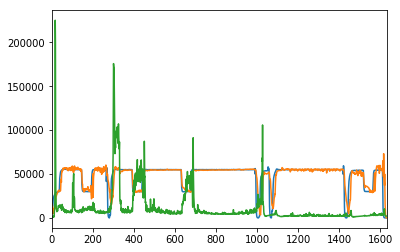

In [29]:
Train2[Train2['process_id'] == 20001].supply_flow.plot(style = ['-'])
Train2[Train2['process_id'] == 20001].return_flow.plot(style = ['-'])
a = 5000*Train2[Train2['process_id'] == 20001].return_turbidity
a.plot(style = ['-'])

In [30]:
from sklearn import preprocessing
import random

Test2c = Test2.groupby(['process_id']).size()
Train2c = Train2.groupby(['process_id']).size()
#Train2c.reset_index(inplace = True)
sample_max = Train2c.max()
sample_min = Train2c.min()
#Test2c['length'] = Test2c.apply(lambda x: np.random.randint(sample_min, sample_max))
#Train2c = Train2.groupby(pd.cut(Train2['process_id'], )
#Train2c['length'] = Train2c.apply(lambda x: np.random.randint(sample_min, sample_max))

#Train2c = Train2.groupby(['process_id'])
Process_ids = Train2['process_id'].unique()
iter1 = 0
for item in Process_ids:
    Train2c1 = Train2[Train2['process_id'] == item][:(Train2c[item]/random.randint(1,6)).astype(int)]
    if iter1 == 0:
        Train2c2 = Train2c1
        iter1 = iter1 + 1
    else:   
        Train2c2 = pd.concat([Train2c2, Train2c1])
    #
#Train2c2  
Train2c2

KeyboardInterrupt: 

In [ ]:
writer = pd.ExcelWriter('Train2c2.xlsx')
Train2c2.to_excel(writer)
writer.save()

In [31]:
Train2c2 = pd.read_excel('Train2c2.xlsx')

In [32]:
Train2c2

,Unnamed: 0,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,...,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period,final_rinse_total_turbidity_liter
0,0,0,20001,405,pre_rinse,2018-04-15 04:20:47,4,8550.348,0.615451,18.044704,...,83.036750,73.032410,45.394646,44.340126,False,0,False,0,False,4.318275e+06
1,1,1,20001,405,pre_rinse,2018-04-15 04:20:49,4,11364.294,0.654297,18.229168,...,83.015045,73.032410,45.394447,44.339380,False,0,False,0,False,4.318275e+06
2,2,2,20001,405,pre_rinse,2018-04-15 04:20:51,4,12174.479,0.699870,18.395544,...,83.015045,73.032410,45.396280,44.336735,False,0,False,0,False,4.318275e+06
3,3,3,20001,405,pre_rinse,2018-04-15 04:20:53,4,13436.776,0.761502,18.583622,...,83.036750,73.032410,45.401875,44.333110,False,0,False,0,False,4.318275e+06
4,4,4,20001,405,pre_rinse,2018-04-15 04:20:55,4,13776.766,0.837240,18.627026,...,83.015045,73.032410,45.398197,44.334373,False,0,False,0,False,4.318275e+06
5,5,5,20001,405,pre_rinse,2018-04-15 04:20:57,4,18710.215,0.944444,18.583622,...,82.993350,73.032410,45.385914,44.336000,False,0,False,0,False,4.318275e+06
6,6,6,20001,405,pre_rinse,2018-04-15 04:20:59,4,21216.725,1.032118,18.460648,...,82.993350,73.032410,45.369984,44.332523,False,0,False,0,False,4.318275e+06
7,7,7,20001,405,pre_rinse,2018-04-15 04:21:01,4,22403.066,1.087891,18.420862,...,82.953560,73.032410,45.381107,44.336490,False,0,False,0,False,4.318275e+06
8,8,8,20001,405,pre_rinse,2018-04-15 04:21:03,4,23278.357,1.140842,18.420862,...,82.953560,73.032410,45.402290,44.334263,False,0,False,0,False,4.318275e+06
9,9,9,20001,405,pre_rinse,2018-04-15 04:21:05,4,24178.965,1.191623,18.377459,...,82.953560,73.032410,45.405660,44.334488,False,0,False,0,False,4.318275e+06


In [33]:
Test2a = Test2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                'target_time_period']]
Test2a['timestamp'] = Test2a['timestamp'].astype('datetime64[ns]')
Test2a['Time_diff'] = Test2a.timestamp.diff()/ timedelta (seconds=1)
Test2a.Time_diff[Test2a['Time_diff'] != 2.0] = 0
Target_time_test = Test2a[Test2a['target_time_period']]
Test2aF = Test2a#[Train2a['target_time_period'] == False]


#Test2aF = Test2aF[Test2aF['process_id'].isin(list5)]

Test2b = Test2[['process_id', 'object_id','pipeline']]

Object_id_test = Test2b.groupby(['process_id', 'object_id']).first()
pipeline_test = Test2b.groupby(['process_id', 'pipeline']).first()

first_test = Test2aF.groupby(['process_id', 'phase']).first()
last_test = Test2aF.groupby(['process_id', 'phase']).last()

first_test = first_test['return_turbidity'].unstack()
last_test = last_test['return_turbidity'].unstack()


max_test = Test2aF.groupby(['process_id', 'phase']).max()

Suppl_flow_test = max_test['supply_flow'].unstack()
ret_flow_test = max_test['return_flow'].unstack()
ret_turbid_test = max_test['return_turbidity'].unstack()


Last_first_test = pd.merge(first_test, last_test, on = 'process_id')
Time_test = Test2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess_test = pd.merge(Last_first_test, Time_test, on = 'process_id')



DatProcess_test.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 'intermediate_rinse':
                             't_intermediate_rinse', 'acid': 't_acid'},
                 inplace = True)

DatProcess_test = DatProcess_test[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'intermediate_rinse_x',
                         't_intermediate_rinse', 'intermediate_rinse_y', 'acid_x', 't_acid', 'acid_y'
                         ]]


Suppl_flow_test.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 'intermediate_rinse':
                             'max_suppl_I_R', 'acid': 'max_suppl_acid'},
                 inplace = True)


ret_flow_test.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 'intermediate_rinse':
                             'max_ret_I_R', 'acid': 'max_ret_acid'},
                 inplace = True)


ret_turbid_test.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 'intermediate_rinse':
                             'max_T_I_R', 'acid': 'max_T_acid'},
                 inplace = True)

RFSF_test = pd.merge(Suppl_flow_test, ret_flow_test, on = 'process_id')
RFSFRT_test = pd.merge(RFSF_test, ret_turbid_test, on = 'process_id')

DatProcess_test = pd.merge(DatProcess_test, RFSFRT_test, on = 'process_id')
DatProcess_test.reset_index(inplace = True)
DatProcess_test.process_id = DatProcess_test.process_id.astype(int)





DatProcess_test = pd.merge(Object_id_test, DatProcess_test, on = 'process_id')
DatProcess_test = pd.merge(pipeline_test, DatProcess_test, on = 'process_id')
Process_id_test = DatProcess_test['process_id']

DatProcess_test

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,process_id,object_id,pipeline,pre_rinse_x,t_pre_rinse,pre_rinse_y,caustic_x,t_caustic,caustic_y,intermediate_rinse_x,...,max_suppl_I_R,max_suppl_P_R,max_ret_acid,max_ret_caustic,max_ret_I_R,max_ret_P_R,max_T_acid,max_T_caustic,max_T_I_R,max_T_P_R
0,20000,427,4,0.018084,174.0,1.432292,4.481337,878.0,1.660156,NaN,...,NaN,35069.4450,NaN,38017.2150,NaN,38765.9140,NaN,13.118489,NaN,87.832756
1,20006,914,6,0.524450,114.0,0.365307,0.361690,386.0,6.676794,NaN,...,NaN,20039.4260,NaN,24743.2010,NaN,24553.3120,NaN,15.274161,NaN,2.289497
2,20007,918,6,0.936777,114.0,1.743345,1.732494,364.0,1.584201,1.613136,...,20540.363,20191.3340,NaN,24936.7050,21683.305,24600.3320,NaN,58.047600,1.707176,4.734520
3,20009,426,4,1.255064,170.0,0.390625,0.368924,770.0,2.596933,1.139323,...,103150.320,35177.9530,NaN,48169.8480,37402.344,48144.5300,NaN,17.078993,1.623987,86.783860
4,20010,924,7,0.318287,170.0,0.810185,0.774016,868.0,2.882668,3.088831,...,45882.164,50057.8670,43330.440,47697.8440,40988.500,48162.6170,64.380790,45.829716,39.565250,30.653212
5,20012,922,7,0.039786,172.0,1.772280,1.710793,546.0,46.737556,44.151478,...,34951.900,50506.3670,NaN,51575.1600,43044.703,47963.6880,NaN,49.884260,44.151478,27.987558
6,20013,116,1,0.130208,140.0,0.661892,0.607639,1682.0,1.186343,NaN,...,NaN,6064.8150,NaN,5732.0600,NaN,5839.1200,NaN,44.715710,NaN,40.165653
7,20015,940,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40816.695,NaN,NaN,NaN,0.148293,NaN,NaN,NaN
8,20020,923,7,2.159288,172.0,0.792101,0.723380,852.0,2.781395,3.240741,...,46742.984,49584.0600,NaN,47108.2900,39196.324,51578.7770,NaN,65.136720,6.517650,6.991464
9,20021,305,3,NaN,NaN,NaN,0.571470,968.0,1.200810,NaN,...,NaN,NaN,NaN,36744.0660,NaN,NaN,NaN,3.873698,NaN,NaN


In [35]:
Train2a = Train2c2[['process_id', 'phase','return_turbidity','timestamp', 'return_flow','supply_flow',
                  'target_time_period']]

Train2a['timestamp'] = Train2a['timestamp'].astype('datetime64[ns]')
Train2a['Time_diff'] = Train2a.timestamp.diff()/ timedelta (seconds=1)
Train2a.Time_diff[Train2a['Time_diff'] != 2.0] = 0
Target_time = Train2a[Train2a['target_time_period']]
Train2aF = Train2a#[Train2a['target_time_period'] == False]


#Train2aF = Train2aF[Train2aF['process_id'].isin(list5)]

Train2b = Train2c2[['process_id', 'object_id','pipeline']]



Object_id = Train2b.groupby(['process_id', 'object_id']).first()
pipeline = Train2b.groupby(['process_id', 'pipeline']).first()

first = Train2aF.groupby(['process_id', 'phase']).first()
last = Train2aF.groupby(['process_id', 'phase']).last()

first = first['return_turbidity'].unstack()
last = last['return_turbidity'].unstack()


max_ = Train2aF.groupby(['process_id', 'phase']).max()

Suppl_flow = max_['supply_flow'].unstack()
ret_flow = max_['return_flow'].unstack()
ret_turbid = max_['return_turbidity'].unstack()


Last_first = pd.merge(first, last, on = 'process_id')
Time = Train2aF.groupby(['process_id', 'phase']).Time_diff.sum().unstack()
DatProcess = pd.merge(Last_first, Time, on = 'process_id')



DatProcess.rename(index=str, columns={'pre_rinse': 't_pre_rinse', 'caustic': 't_caustic', 'intermediate_rinse':
                             't_intermediate_rinse', 'acid': 't_acid', 'final_rinse': 't_final_rinse'},
                 inplace = True)

DatProcess = DatProcess[['pre_rinse_x', 't_pre_rinse','pre_rinse_y', 'caustic_x', 't_caustic','caustic_y', 
                         'intermediate_rinse_x',
                         't_intermediate_rinse', 'intermediate_rinse_y', 'acid_x', 't_acid', 'acid_y',
                         'final_rinse_x',
                        't_final_rinse', 'final_rinse_y']]


Suppl_flow.rename(index=str, columns={'pre_rinse': 'max_suppl_P_R', 'caustic': 'max_suppl_caustic', 'intermediate_rinse':
                             'max_suppl_I_R', 'acid': 'max_suppl_acid', 
                                      'final_rinse': 'max_suppl_final_rinse'},
                 inplace = True)


ret_flow.rename(index=str, columns={'pre_rinse': 'max_ret_P_R', 'caustic': 'max_ret_caustic', 'intermediate_rinse':
                             'max_ret_I_R', 'acid': 'max_ret_acid', 
                                    'final_rinse': 'max_ret_final_rinse'},
                 inplace = True)


ret_turbid.rename(index=str, columns={'pre_rinse': 'max_T_P_R', 'caustic': 'max_T_caustic', 'intermediate_rinse':
                             'max_T_I_R', 'acid': 'max_T_acid', 
                                    'final_rinse': 'max_T_final_rinse'},
                 inplace = True)

RFSF = pd.merge(Suppl_flow, ret_flow, on = 'process_id')
RFSFRT = pd.merge(RFSF, ret_turbid, on = 'process_id')

DatProcess = pd.merge(DatProcess, RFSFRT, on = 'process_id')
DatProcess.reset_index(inplace = True)
DatProcess.process_id = DatProcess.process_id.astype(int)



DatProcess


#'20146',
# '20341',
# '21637',
# '21833',
# '21941',
# '23756',
# '23830',
# '25376',
# '26908

#Train2a[Train2a['process_id'] == 20146].phase.unique()
#meta[meta['process_id'] == 26908]
#Train2a[Train2a['process_id'] == 26908].target_time_period
#DatProcess

DatProcess = pd.merge(Object_id, DatProcess, on = 'process_id')
DatProcess = pd.merge(pipeline, DatProcess, on = 'process_id')
Process_id = DatProcess['process_id']

le = preprocessing.LabelEncoder()

Merging = pd.concat([DatProcess, DatProcess_test], sort = False)
Merging_encoded = Merging.apply(le.fit_transform)

DatProcess_encoded = Merging_encoded[:len(DatProcess)]
DatProcess_test_encoded = Merging_encoded[len(DatProcess):]

DatProcess_encoded = DatProcess_encoded.drop(['process_id'], axis=1)
DatProcess_encoded = pd.concat([Process_id, DatProcess_encoded], axis=1)
DatProcess_encoded = pd.merge(DatProcess_encoded, Labels, on = 'process_id')

DatProcess_test_encoded = DatProcess_test_encoded.drop(['process_id'], axis=1)
DatProcess_test_encoded = pd.concat([Process_id_test, DatProcess_test_encoded], axis=1)
#DatProcess_test_encoded = pd.merge(DatProcess_test_encoded, Labels, on = 'process_id')


X3 = DatProcess_encoded.drop(['process_id','final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse', 'final_rinse_total_turbidity_liter' 
                             ], 
                             axis = 1) # Trainning columns

Xtestall = DatProcess_test_encoded.drop(['process_id', 'final_rinse_y','final_rinse_x','t_final_rinse',
                             'max_suppl_final_rinse', 'max_ret_final_rinse', 
                             'max_T_final_rinse'], axis =1)

y3 = DatProcess_encoded.final_rinse_total_turbidity_liter.astype(int) #testing columns



X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=0) # split for trainning

scaler = MinMaxScaler() #for scaling

X_train_Scl2 = scaler.fit_transform(X_train3) #scaling the data since we distance and the weight 
X_test_Scl2 = scaler.transform(X_test3)# can have an effect on the regression

Xtestall_scl = scaler.transform(Xtestall)



/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

In [36]:
from sklearn.svm import SVC

clf = SVC(gamma = .1, C = 10, kernel = 'rbf')

#.1, C = 10

clf.fit(X_train_Scl2, y_train3)
y_important_pred4 = clf.predict(X_test_Scl2)

def mean_absolute_percentage_error(y_test3, y_important_pred4): 
   
    Y = pd.DataFrame(y_test3, y_important_pred4).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred4 = np.array(y_test3), np.array(y_important_pred4)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred4) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred4)


ySVCallSample = clf.predict(Xtestall_scl)
ySVCallSample

array([5030004,  857466, 1047687, ..., 1706017,  577305,  201620])

In [37]:
lr = LogisticRegression(penalty='l1', C = 100, max_iter=40,  solver = 'liblinear', multi_class = 'auto') 

#We use L1 because we have#already done feature selection


lr.fit(X_train_Scl2, y_train3)
y_important_pred3a = lr.predict(X_test_Scl2)



def mean_absolute_percentage_error(y_test3, y_important_pred3a): 
   
    Y = pd.DataFrame(y_test3, y_important_pred3a).reset_index()
    Y.columns= ['Y2', 'Y1']
    Y['Y1'] = np.array(y_test3)
    Y['Y2'] = 290000#Y[Y['Y1']>0].Y1.min()
    y_test3, y_important_pred3a = np.array(y_test3), np.array(y_important_pred3a)
    ymax_test = np.array(Y.max(axis=1))#np.array(y_test3)
    MAPE_PR = np.mean(np.abs((y_test3 - y_important_pred3a) / ymax_test)) * 100
    return MAPE_PR
mean_absolute_percentage_error(y_test3, y_important_pred3a)

/Users/christianbeynis/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


252.7700797816677

In [55]:
y_estimate_all = .5*(ySVCallSample + ySVCall)
print(len(y_estimate_all), len(ySVCallSample), len(ySVCall))
DatProcess_testall['process_id']
Ret_all = pd.Series(y_estimate_all)
#pd.concat([DatProcess_testall['process_id'], ])
y_estimate_all = pd.concat([DatProcess_testall['process_id'], Ret_all], axis = 1 )

y_estimate_all

2967 2967 2967


,process_id,0
0,20000,3820690.0
1,20006,2639263.0
2,20007,812496.0
3,20009,692506.5
4,20010,803460.0
5,20012,1045060.0
6,20013,328734.0
7,20015,292656.5
8,20020,986596.0
9,20021,357771.0


In [56]:
y_estimate_5 = (ylr5 + ySVC5)/2
print(len(y_estimate_5),len(ySVC5_RT), len(ySVC5))

DatProcess_test5['process_id']
Ret_5 = pd.Series(y_estimate_5)
y_estimate_5 = pd.concat([DatProcess_test5['process_id'], Ret_5], axis = 1 )

y_estimate_5

2258 2258 2258


,process_id,0
0,20000,1126040.0
1,20007,875368.5
2,20009,767690.5
3,20010,608293.0
4,20012,51942441.0
5,20013,64547.0
6,20020,353866.0
7,20022,47126103.5
8,20024,1336527.0
9,20026,1114718.5


In [57]:
y_estimate_acid = .5*(y3RFTacid + ySVC3acid)
print(len(y_estimate_acid),len(y3RFTacid), len(ySVC3acid))

DatProcess_test_acid['process_id']
Ret_acid = pd.Series(y_estimate_acid)
y_estimate_acid = pd.concat([DatProcess_test_acid['process_id'], Ret_acid], axis = 1 )

y_estimate_acid


122 122 122


,process_id,0
0,20015,4646750.5
1,20040,185615.5
2,20159,2570646.0
3,20169,322946.5
4,20186,172078.0
5,20361,176462.5
6,20379,476842.0
7,20448,202156.5
8,20513,328164.5
9,20599,165562.0


In [58]:
y_estimate_caustic = (y3causticlr + y3causticSVC)/2
print(len(y_estimate_caustic),len(y3causticlr), len(y3causticSVC))

DatProcess_test_caustic['process_id']
Ret_caustic = pd.Series(y_estimate_caustic)
y_estimate_caustic = pd.concat([DatProcess_test_caustic['process_id'], Ret_caustic], axis = 1 )

y_estimate_caustic

587 587 587


,process_id,0
0,20006,3465326.5
1,20021,3030506.5
2,20031,3465326.5
3,20093,3030506.5
4,20099,3465326.5
5,20106,3030506.5
6,20137,3250850.0
7,20150,3030506.5
8,20184,3685670.0
9,20194,3685670.0


In [59]:
#pd.merge(df1, df2, on=['id', 'name']).set_index(['id', 'name']).sum(axis=1)

y1 = y_estimate_all.merge(y_estimate_5,how='left', left_on='process_id', right_on='process_id')
y2 = y1.merge(y_estimate_caustic, how='left', left_on='process_id', right_on='process_id')
y3 = y2.merge(y_estimate_acid, how='left', left_on='process_id', right_on='process_id')
#y1.merge(y_estimate_acid, left_on='process_id', right_on='process_id')

y3.columns.values

y3.columns = ['process_id', 'all', '5', 'caustic', 'acid']


y3['final_rinse_total_turbidity_liter'] = y3[ [ 'all', '5', 'caustic', 'acid']].mean(axis=1)
yfinal = y3[['process_id', 'final_rinse_total_turbidity_liter']]
yfinal = yfinal.set_index('process_id')
yfinal


,final_rinse_total_turbidity_liter
process_id,
20000,2473365.00
20006,3052294.75
20007,843932.25
20009,730098.50
20010,705876.50
20012,26493750.50
20013,196640.50
20015,2469703.50
20020,670231.00


In [ ]:
#writer = pd.ExcelWriter('yfinal.xlsx')
#yfinal.to_excel(writer)
#writer.save()

In [60]:
import pandas as pd
#yfinal_xls = pd.read_excel('yfinal1.xlsx', index_col=None)
#yfinal_xls.to_csv('yfinal_csv.csv', encoding='utf-8', index = False)
#file = pd.read_csv('yfinal_csv.csv')
#file
yfinal.to_csv('Yfinal1',  encoding='utf-8')
file = pd.read_csv('Yfinal1')
file




,process_id,final_rinse_total_turbidity_liter
0,20000,2473365.00
1,20006,3052294.75
2,20007,843932.25
3,20009,730098.50
4,20010,705876.50
5,20012,26493750.50
6,20013,196640.50
7,20015,2469703.50
8,20020,670231.00
9,20021,1694138.75
